In [1]:
# run with conda env 'jupiter'

import numpy as np
import os
from IPython import embed
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import pandas as pd
import seaborn as sns
from scipy.ndimage import sobel, grey_erosion, grey_dilation

In [2]:
# Get test images paths 
f_img_dir = '../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4.tif'
s4h_img_dir = '../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_R1h_XY5.tif'
r1h_img_dir = '../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_S4h_XY2.tif'

f_img = cv2.imread(f_img_dir, cv2.IMREAD_UNCHANGED)
s4h_img = cv2.imread(s4h_img_dir, cv2.IMREAD_UNCHANGED)
r1h_img = cv2.imread(r1h_img_dir, cv2.IMREAD_UNCHANGED)

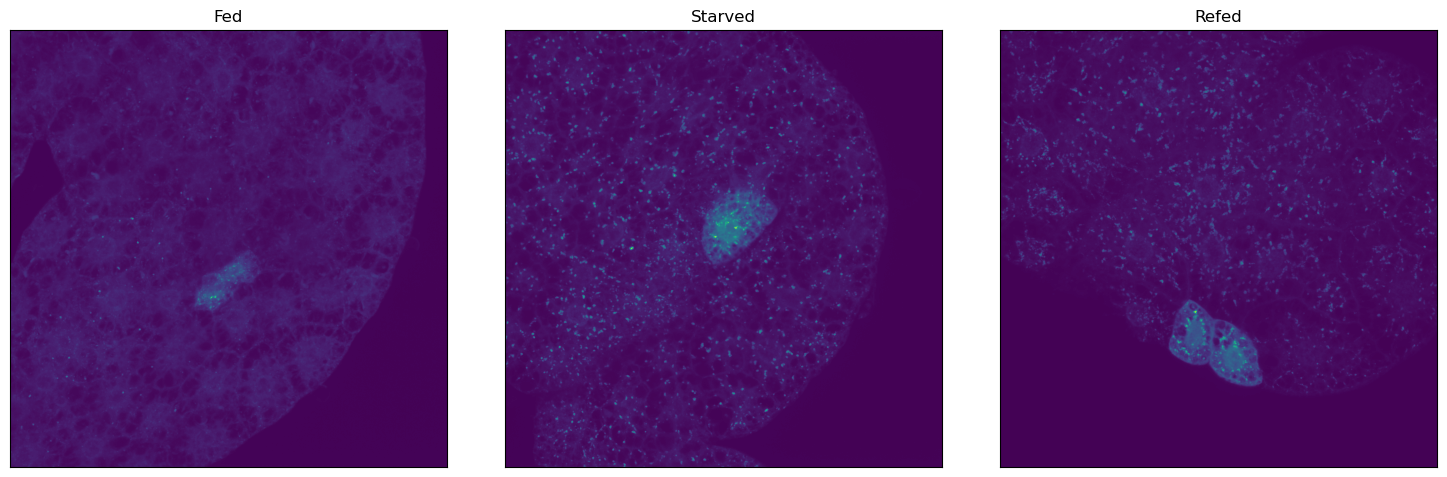

In [3]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plt.tight_layout()

for ax in [ax1, ax2, ax3]:
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

ax1.imshow(f_img)
ax1.set_title('Fed')

ax2.imshow(s4h_img)
ax2.set_title('Starved')

ax3.imshow(r1h_img)
ax3.set_title('Refed')
plt.show()

In [5]:
# Get test images
img_dir = '../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4.tif'
mask_dir = '../data/fullsize/test/masks/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4_masks.png'
img = cv2.imread(img_dir, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_dir, cv2.IMREAD_UNCHANGED)

In [5]:
# Get test images
img_dir = '../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_R1h_XY5.tif'
mask_dir = '../data/fullsize/test/masks/MF_MaxIP_3ch_2_000_230623_544_84_R1h_XY5_masks.png'
img = cv2.imread(img_dir, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_dir, cv2.IMREAD_UNCHANGED)

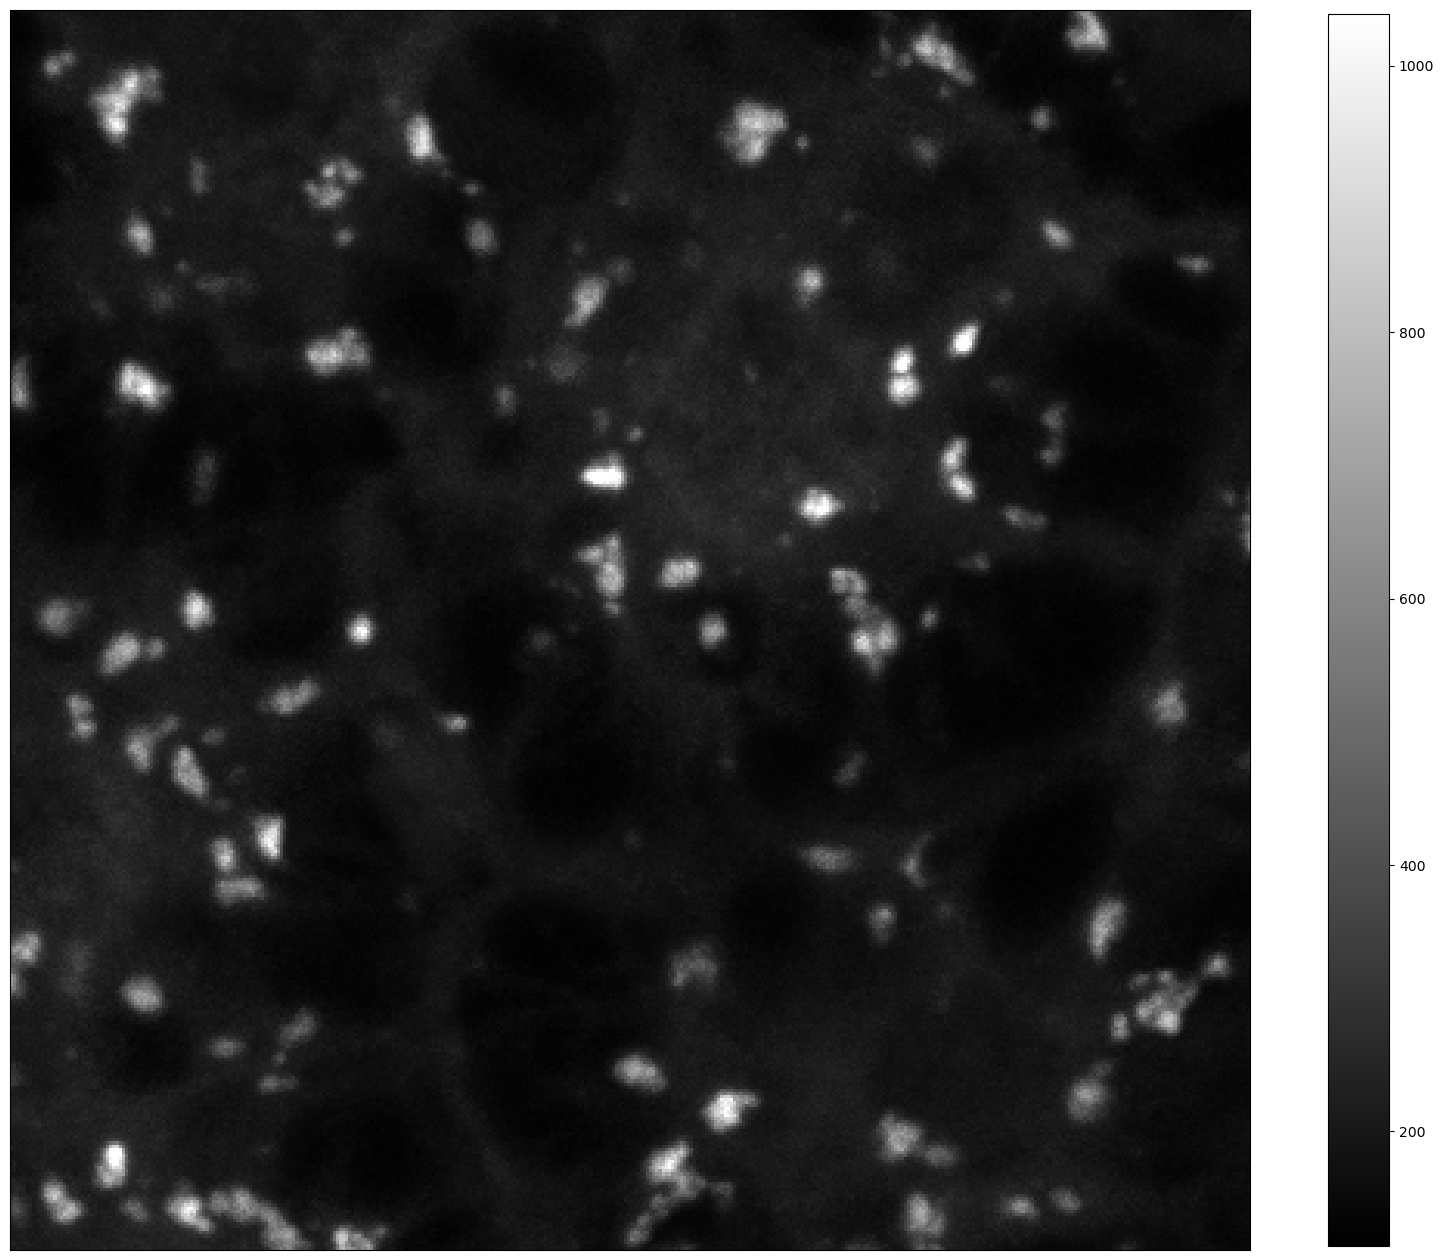

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2  # Ensure you import OpenCV if needed for your code

# Assuming img and mask are already loaded arrays
# Here, we're using a placeholder for demonstration
# img = cv2.imread('your_image_file.jpg', cv2.IMREAD_GRAYSCALE)
# mask = cv2.imread('your_mask_file.jpg', cv2.IMREAD_GRAYSCALE)

# Crop parameters
x_s = 100
y_s = 100
size = 400
# size = 60  # Uncomment to use a different cropping size
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

# Create a figure
original_max = img.max()  # Get the max value of the entire image
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Use imshow to display the cropped image and create a mappable object
plot = ax.imshow(img_cropped, cmap='gray', vmax=original_max * 0.5)
# ax.set_title('Atg8 Channel', fontsize=24)

# Create the colorbar using the `plot` object returned by imshow
cbar = plt.colorbar(plot, ax=ax, shrink=0.8)

# Save the plot
plt.savefig('plots/atg8_channel_spots.png', bbox_inches='tight')
plt.show()  # To display the plot


/tmp/ipykernel_317067/1652995023.py:25: UserWarning: Adding colorbar to a different Figure <Figure size 2000x2000 with 2 Axes> than <Figure size 2000x2000 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(plot, ax=ax, shrink=0.8)


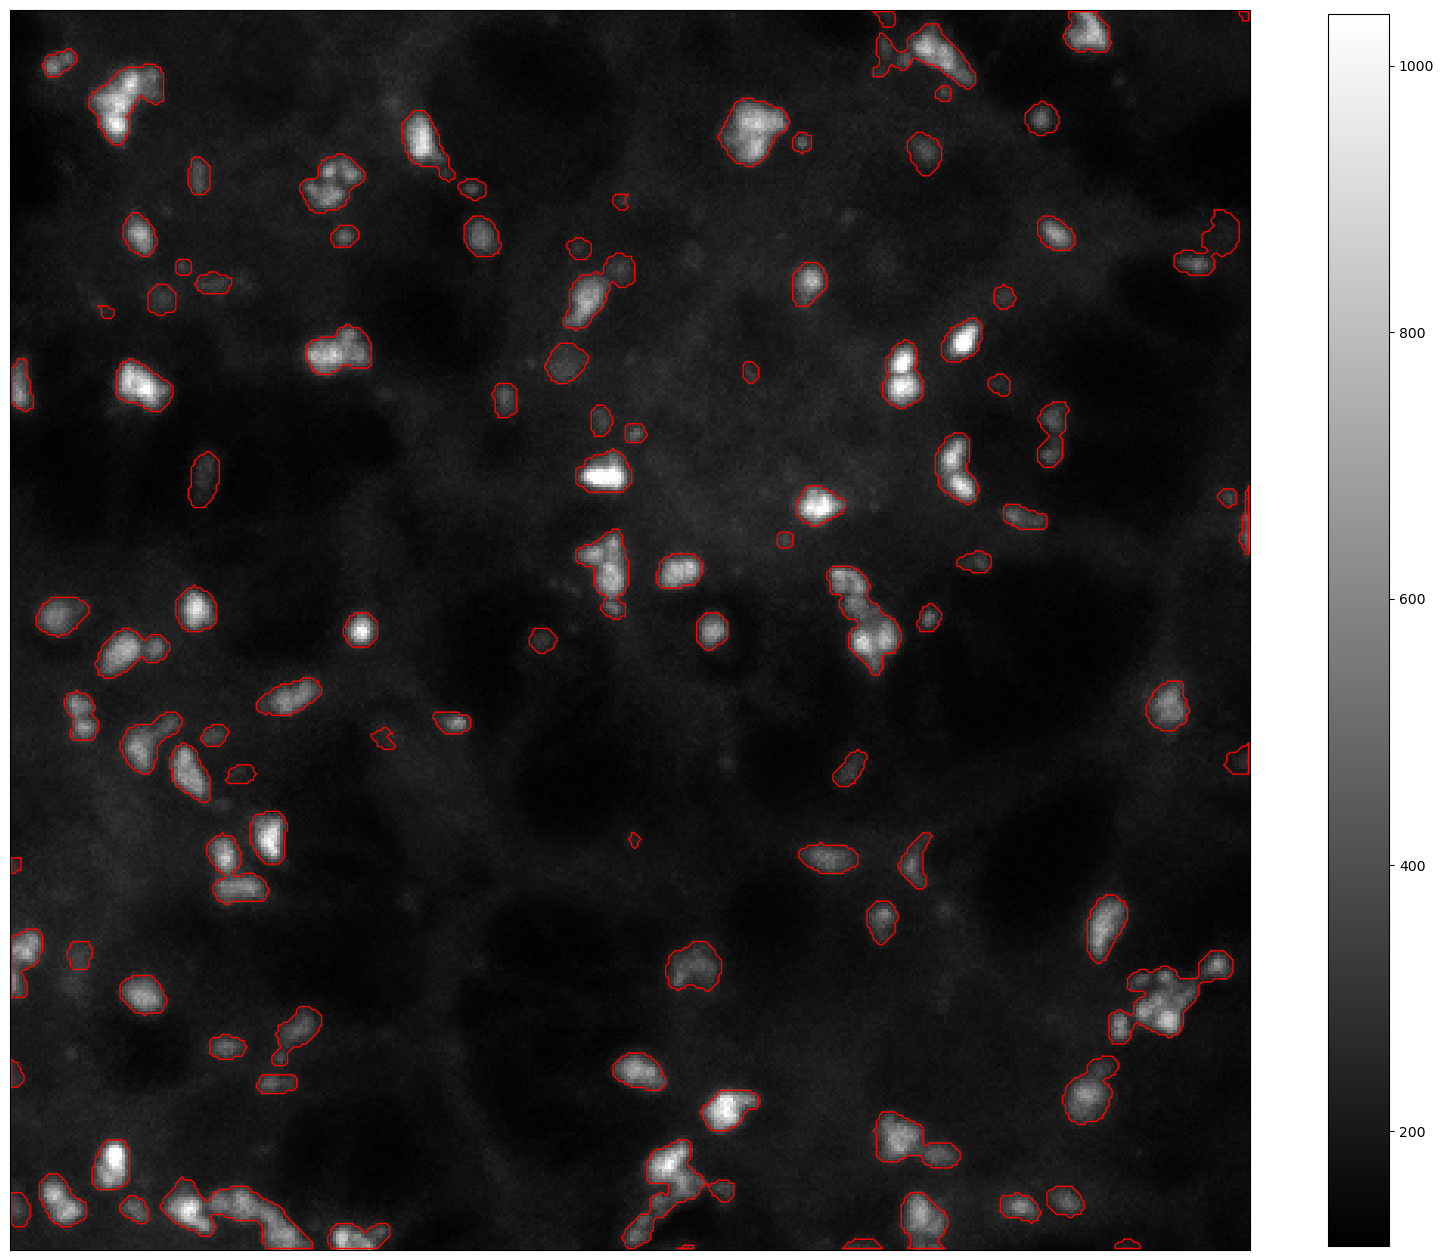

In [20]:
# crop image
x_s = 100
y_s = 100
size = 400

img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

# get gt contours
contours, _ = cv2.findContours(mask_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure with 4 subplots
original_max = img.max()
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

ax.imshow(img_cropped, cmap='gray', vmax = original_max*0.5)
# ax.set_title('Ground Truth Spots', fontsize=24)

for contour in contours:
    contour = np.vstack((contour, contour[0].reshape(1, 1, 2)))
    plt.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)

# Create the colorbar using the `plot` object returned by imshow
cbar = plt.colorbar(plot, ax=ax, shrink=0.8)

plt.savefig('plots/gt_spots.png', bbox_inches='tight') 



/tmp/ipykernel_317067/782036271.py:29: UserWarning: Adding colorbar to a different Figure <Figure size 2000x2000 with 2 Axes> than <Figure size 2000x2000 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(plot, ax=ax, shrink=0.8)


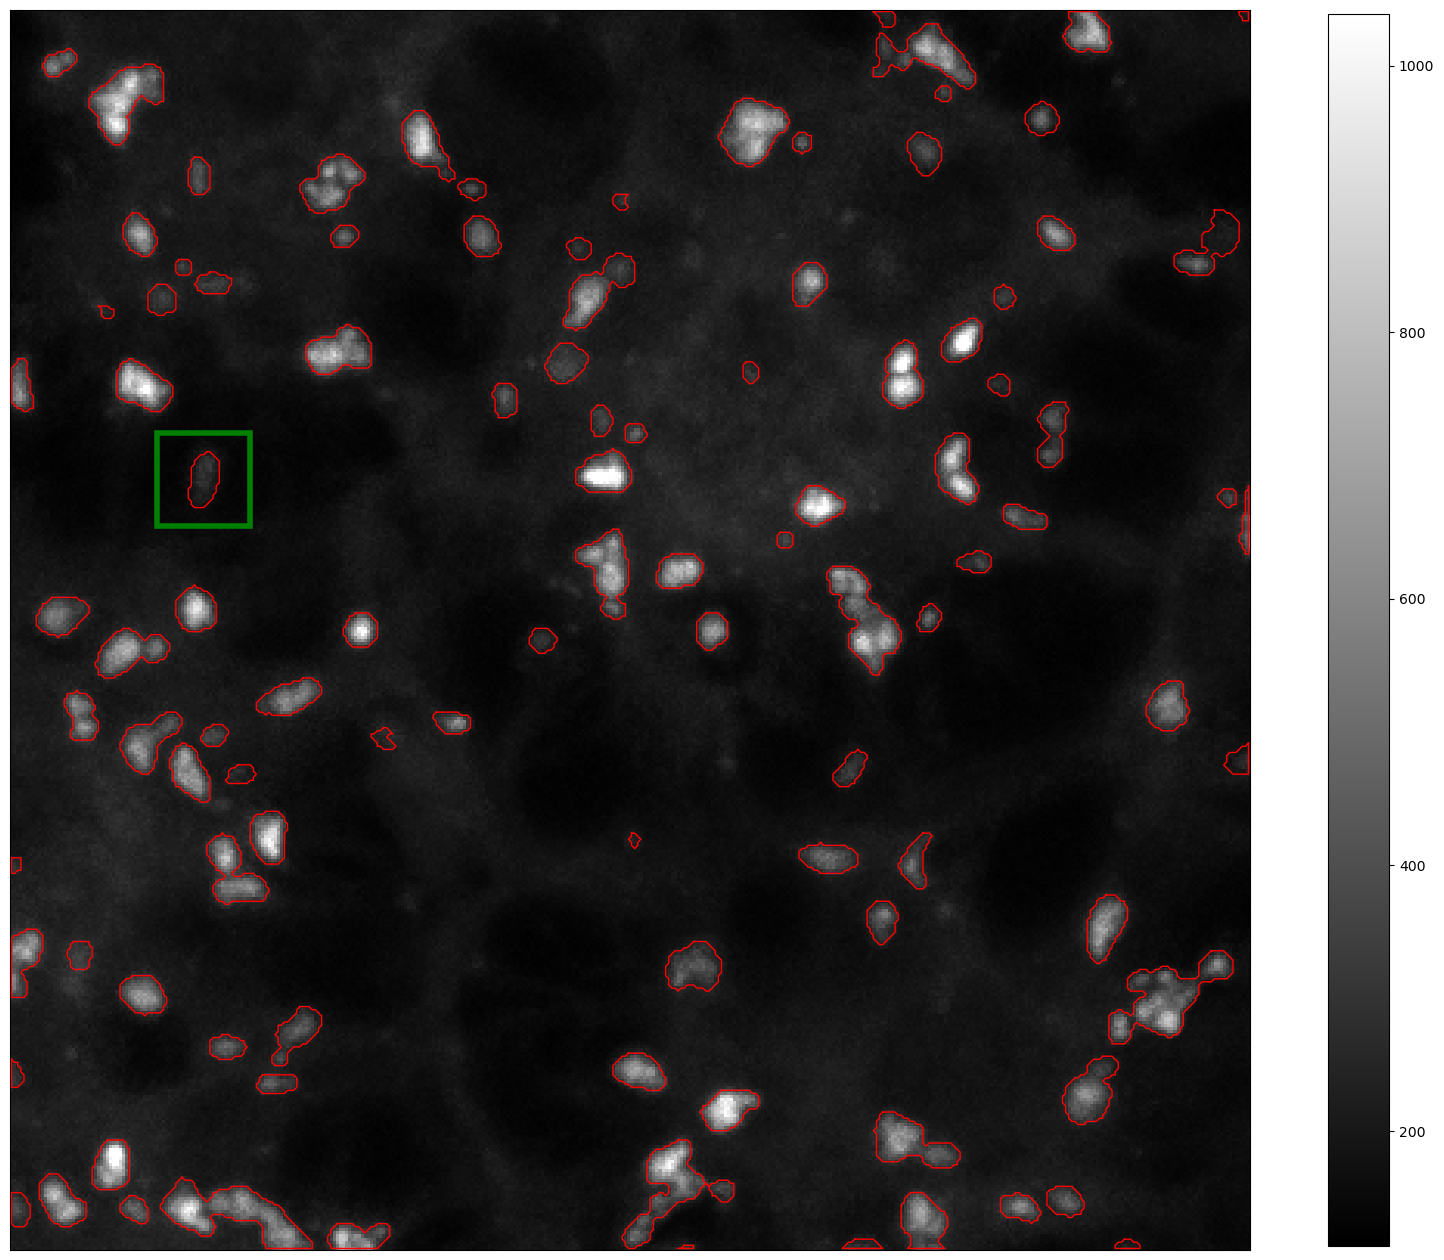

In [22]:
# crop image
x_s = 100
y_s = 100
size = 400
# x_s = 180
# y_s = 180
# size = 60
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

contours, _ = cv2.findContours(mask_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure with 4 subplots
original_max = img.max()
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

ax.imshow(img_cropped, cmap='gray', vmax = original_max*0.5)
# ax.set_title('Ground Truth Spots', fontsize=24)

for contour in contours:
    contour = np.vstack((contour, contour[0].reshape(1, 1, 2)))
    plt.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)

square = patches.Rectangle((47, 136), 30, 30, linewidth=4, edgecolor='g', facecolor='none', zorder=3)
ax.add_patch(square)

# Create the colorbar using the `plot` object returned by imshow
cbar = plt.colorbar(plot, ax=ax, shrink=0.8)

plt.savefig('plots/gt_spots_square.png', bbox_inches='tight') 

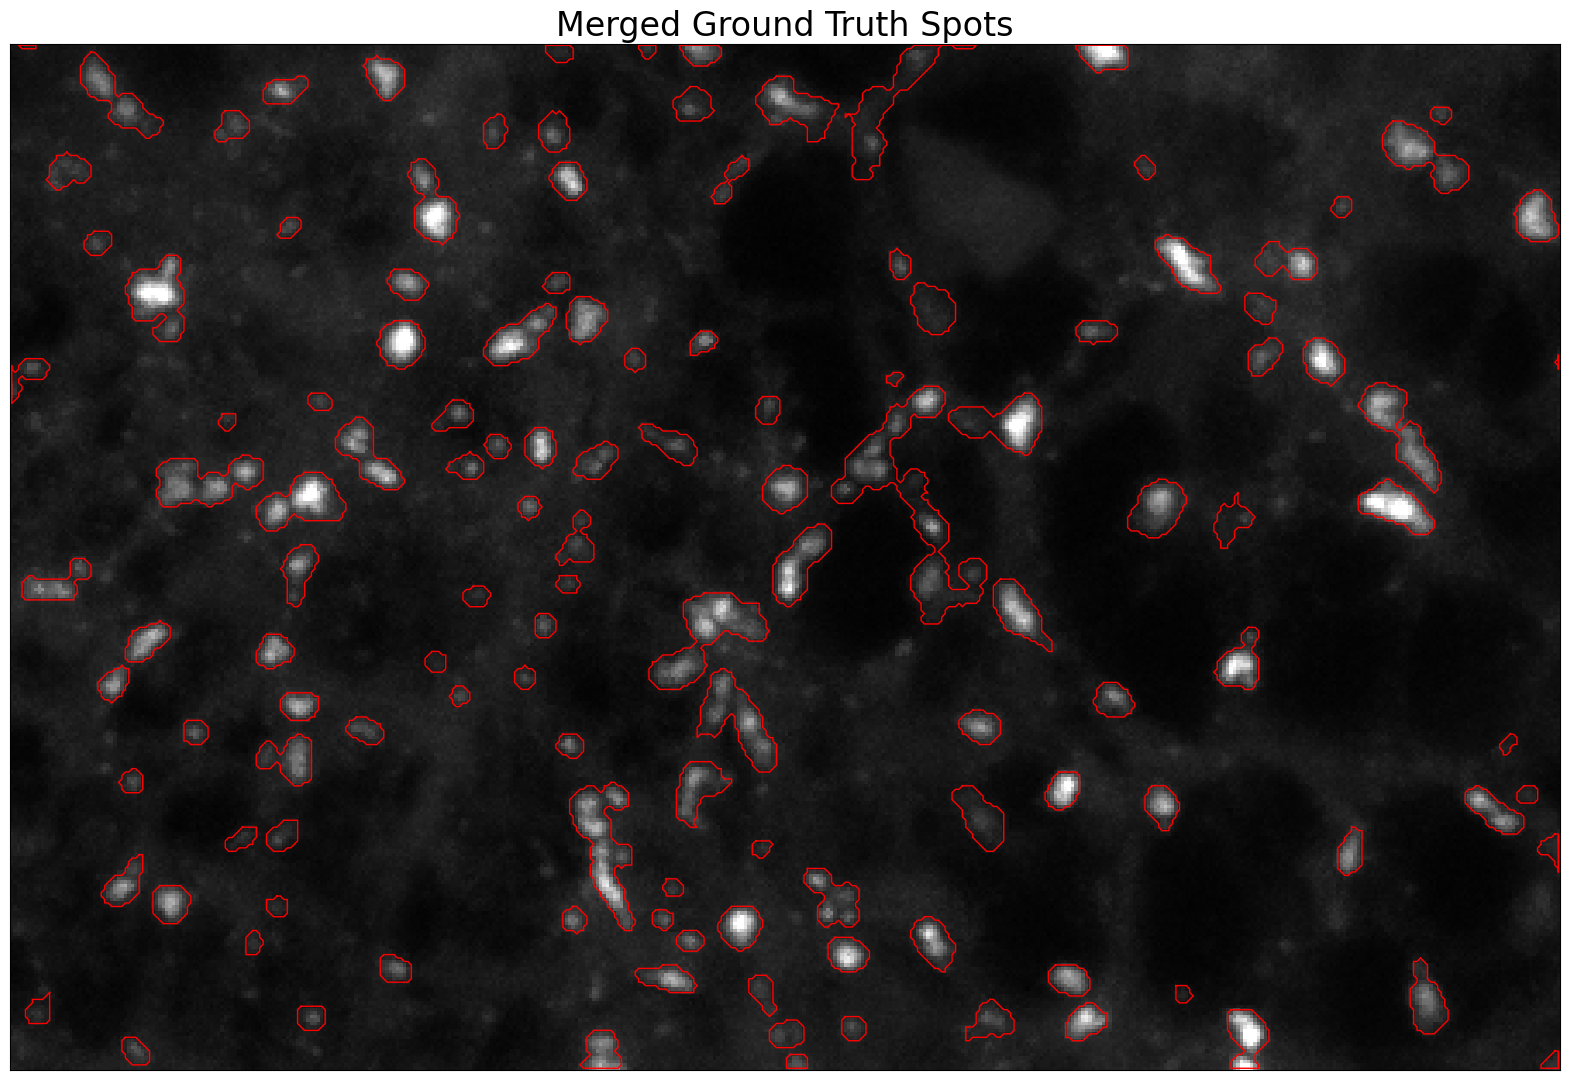

In [9]:
# crop image
x_s = 200
y_s = 1750
size = 450
# x_s = 180
# y_s = 180
# size = 60
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

contours, _ = cv2.findContours(mask_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure with 4 subplots
original_max = img.max()
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

ax.imshow(img_cropped, cmap='gray', vmax = original_max*0.5)
ax.set_title('Merged Ground Truth Spots', fontsize=24)

for contour in contours:
    contour = np.vstack((contour, contour[0].reshape(1, 1, 2)))
    plt.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)

plt.savefig('plots/merged_spots.png', bbox_inches='tight') 

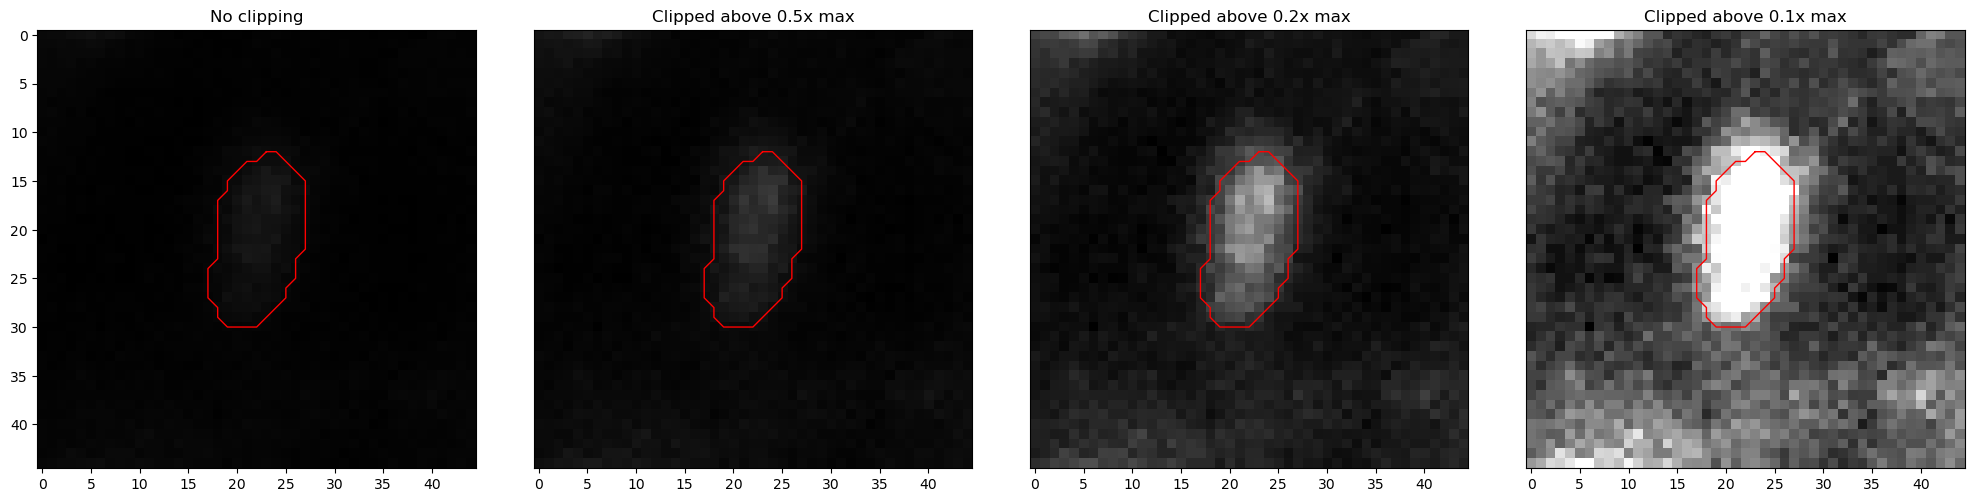

In [23]:
# crop image
x_s = 140
y_s = 230
size = 45
# x_s = 180
# y_s = 180
# size = 60
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

contours, _ = cv2.findContours(mask_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure with 4 subplots
original_max = img.max()
clip_val = [0.8,0.5,0.2, 0.1]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
plt.tight_layout()

for ax in [ ax2, ax3, ax4]:
    ax.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)


ax1.imshow(img_cropped, cmap='gray', vmax = original_max)
ax1.set_title('No clipping')

ax2.imshow(img_cropped, cmap = 'gray', vmax = original_max*clip_val[1])
ax2.set_title(f'Clipped above {clip_val[1]}x max')

ax3.imshow(img_cropped, cmap = 'gray', vmax = original_max * clip_val[2])
ax3.set_title(f'Clipped above {clip_val[2]}x max')

ax4.imshow(img_cropped, cmap = 'gray', vmax = original_max * clip_val[3])
ax4.set_title(f'Clipped above {clip_val[3]}x max')


for contour in contours:
    contour = np.vstack((contour, contour[0].reshape(1, 1, 2)))
    ax1.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    ax2.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    ax3.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    ax4.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)

plt.savefig('plots/spot_diff_intensity.png', bbox_inches='tight') 

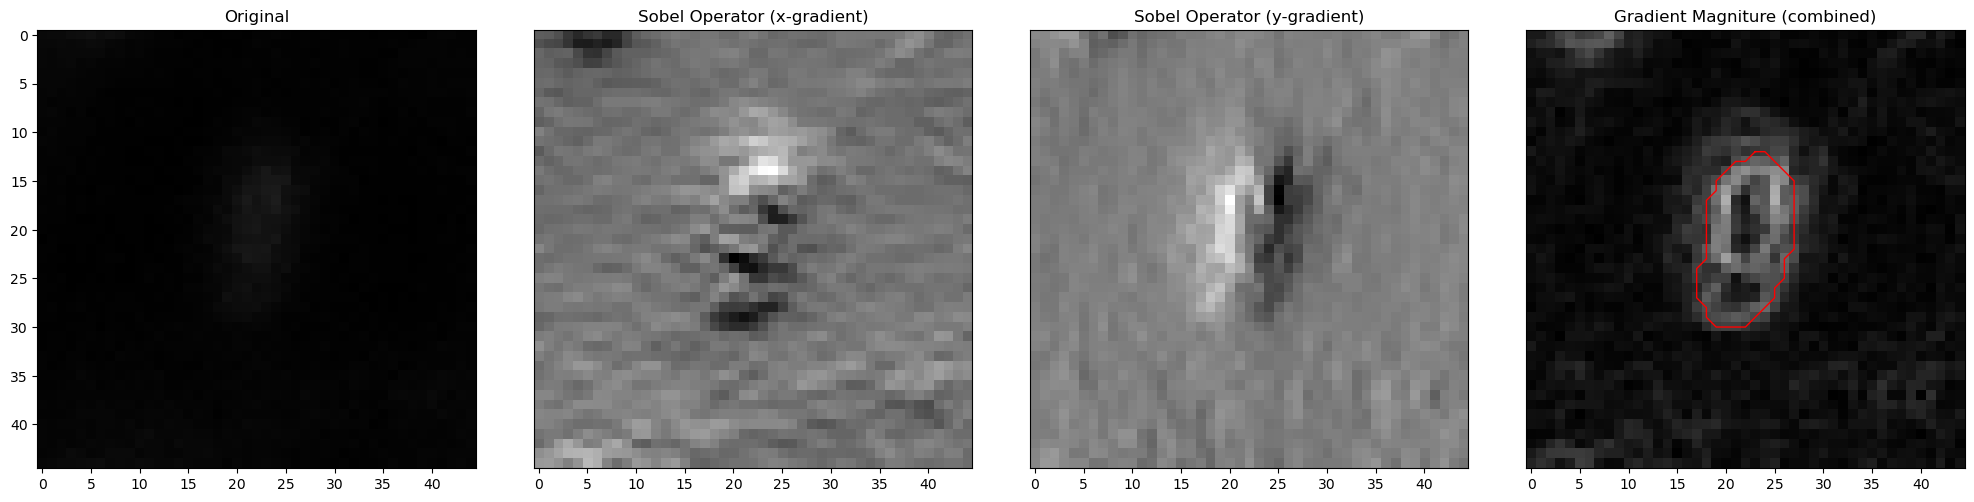

In [39]:
# crop image
# x_s = 180
# y_s = 180
# size = 60
x_s = 140
y_s = 230
size = 45
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

blur = 1
img_blurred = cv2.GaussianBlur(img_cropped, (blur, blur), 0)
img_cropped = img_blurred.astype('int32')

# Step 3: Compute the first derivatives (Sobel filter)
sobel_x = sobel(img_cropped, axis=0)
sobel_y = sobel(img_cropped, axis=1)

# Compute the gradient magnitude
gradient_magnitude = np.hypot(sobel_x, sobel_y)


contours, _ = cv2.findContours(mask_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure with 4 subplots
original_max = img.max()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
plt.tight_layout()

for ax in [ ax2, ax3, ax4]:
    ax.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)


ax1.imshow(img_cropped, cmap='gray', vmax = original_max * 1)
ax1.set_title('Original')

ax2.imshow(sobel_x, cmap = 'gray')
ax2.set_title(f'Sobel Operator (x-gradient)')

ax3.imshow(sobel_y, cmap = 'gray')
ax3.set_title(f'Sobel Operator (y-gradient)')

ax4.imshow(gradient_magnitude, cmap = 'gray', vmax = original_max * 0.3)
ax4.set_title('Gradient Magniture (combined)')


for contour in contours:
    contour = np.vstack((contour, contour[0].reshape(1, 1, 2)))
    # ax1.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    #ax2.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    #ax3.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    ax4.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)

plt.savefig('plots/gradient_magn_zoom.png', bbox_inches='tight') 

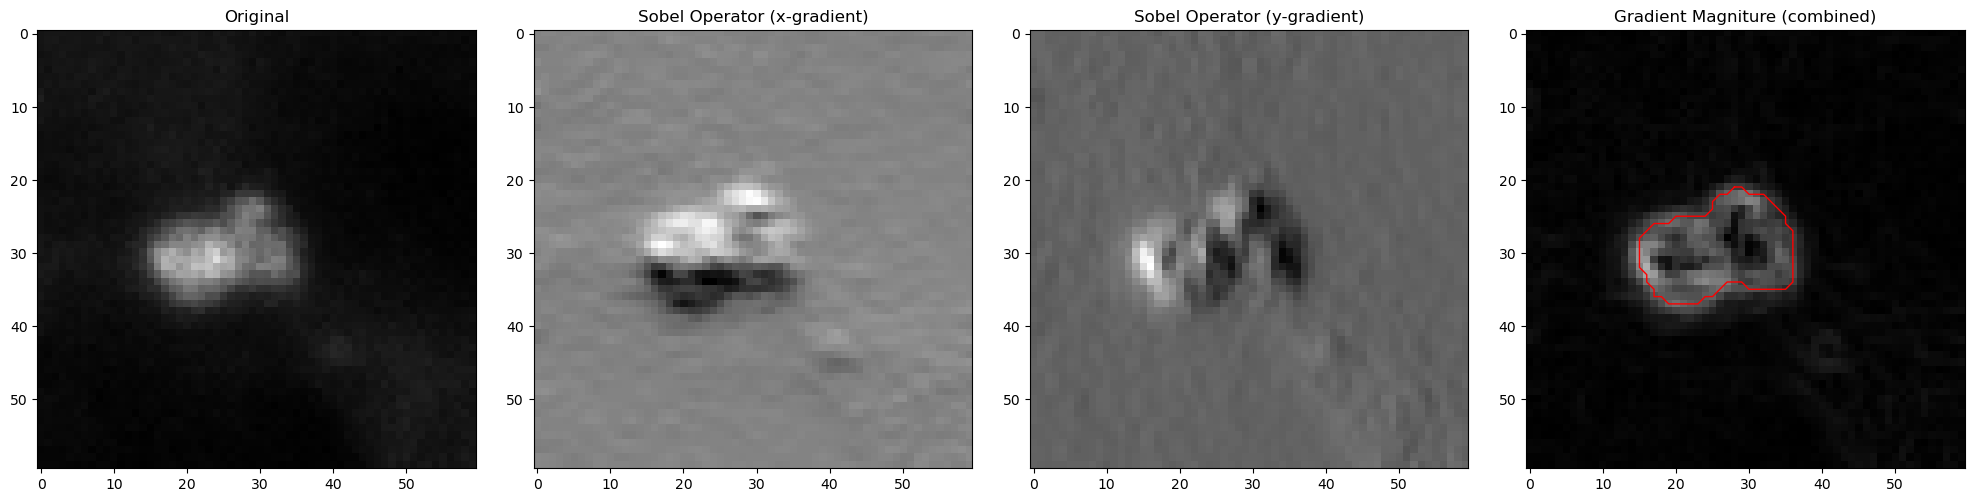

In [23]:
# crop image
x_s = 180
y_s = 180
size = 60
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

blur = 1
img_blurred = cv2.GaussianBlur(img_cropped, (blur, blur), 0)
img_cropped = img_blurred.astype('int32')

# Step 3: Compute the first derivatives (Sobel filter)
sobel_x = sobel(img_cropped, axis=0)
sobel_y = sobel(img_cropped, axis=1)

# Compute the gradient magnitude
gradient_magnitude = np.hypot(sobel_x, sobel_y)


contours, _ = cv2.findContours(mask_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure with 4 subplots
original_max = img.max()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
plt.tight_layout()

#for ax in [ax1, ax2, ax3, ax4]:
 #   ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


ax1.imshow(img_cropped, cmap='gray', vmax = original_max * 0.5)
ax1.set_title('Original')

ax2.imshow(sobel_x, cmap = 'gray')
ax2.set_title(f'Sobel Operator (x-gradient)')

ax3.imshow(sobel_y, cmap = 'gray')
ax3.set_title(f'Sobel Operator (y-gradient)')

ax4.imshow(gradient_magnitude, cmap = 'gray', vmax = original_max * 1)
ax4.set_title('Gradient Magniture (combined)')


for contour in contours:
    contour = np.vstack((contour, contour[0].reshape(1, 1, 2)))
    # ax1.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    #ax2.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    #ax3.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    ax4.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)

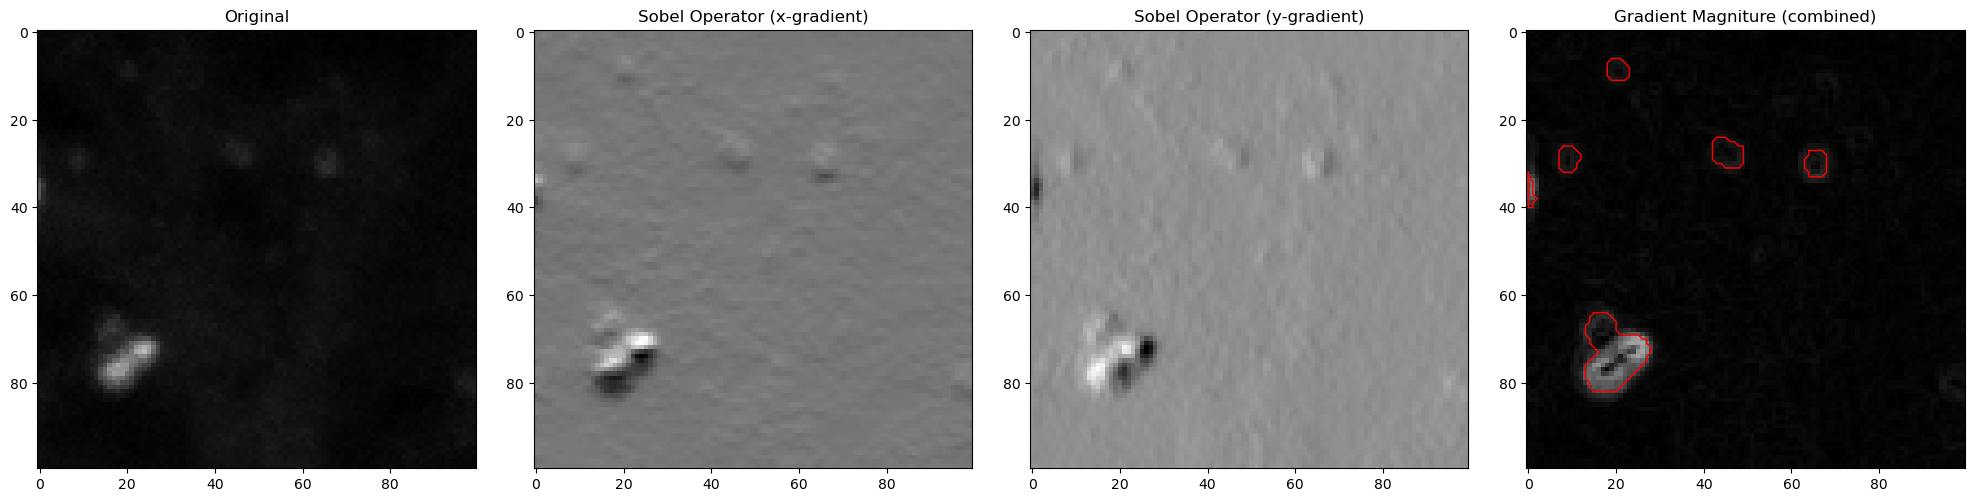

In [24]:
# crop image
x_s = 0
y_s = 0
size = 100
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

blur = 1
img_blurred = cv2.GaussianBlur(img_cropped, (blur, blur), 0)
img_cropped = img_blurred.astype('int32')

# Step 3: Compute the first derivatives (Sobel filter)
sobel_x = sobel(img_cropped, axis=0)
sobel_y = sobel(img_cropped, axis=1)

# Compute the gradient magnitude
gradient_magnitude = np.hypot(sobel_x, sobel_y)


contours, _ = cv2.findContours(mask_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure with 4 subplots
original_max = img.max()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
plt.tight_layout()

#for ax in [ax1, ax2, ax3, ax4]:
 #   ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


ax1.imshow(img_cropped, cmap='gray', vmax = original_max * 0.5)
ax1.set_title('Original')

ax2.imshow(sobel_x, cmap = 'gray')
ax2.set_title(f'Sobel Operator (x-gradient)')

ax3.imshow(sobel_y, cmap = 'gray')
ax3.set_title(f'Sobel Operator (y-gradient)')

ax4.imshow(gradient_magnitude, cmap = 'gray', vmax = original_max * 1)
ax4.set_title('Gradient Magniture (combined)')


for contour in contours:
    contour = np.vstack((contour, contour[0].reshape(1, 1, 2)))
    # ax1.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    #ax2.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    #ax3.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    ax4.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)

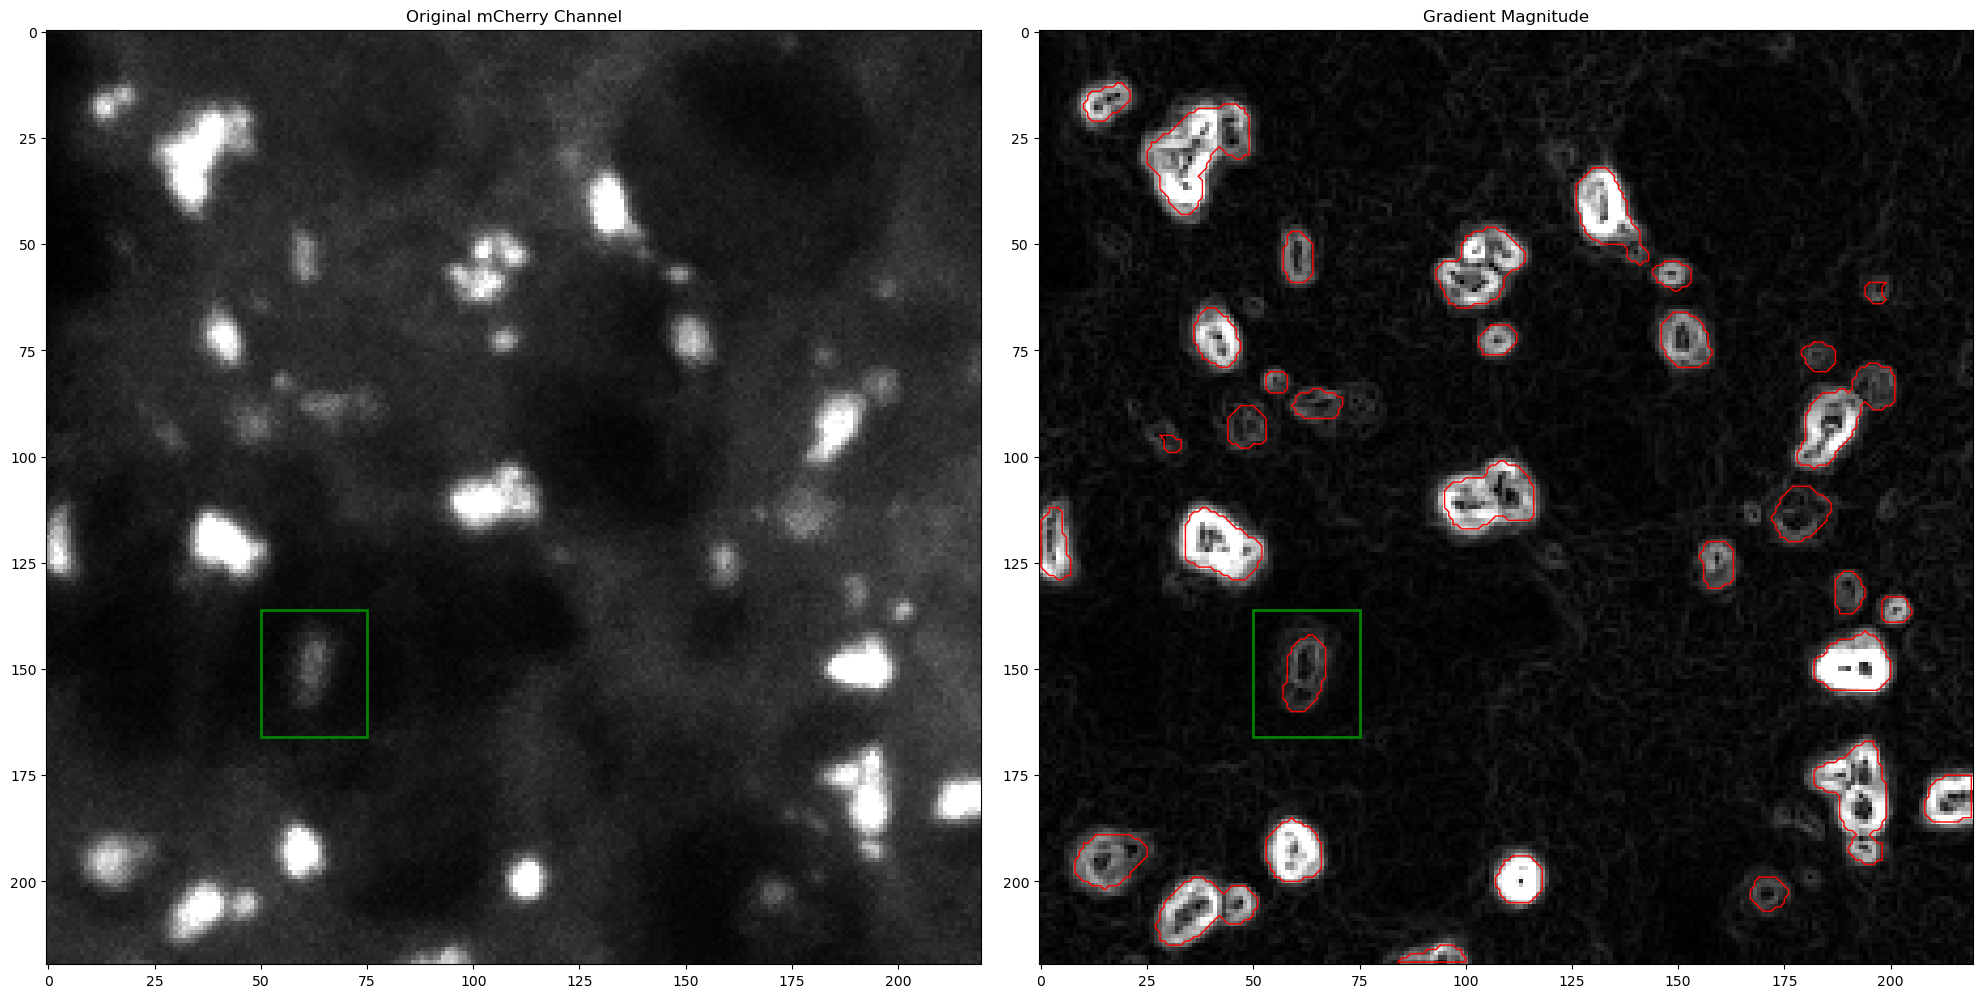

In [25]:
# crop image
x_s = 100
y_s = 100
size = 220
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

blur = 1
img_blurred = cv2.GaussianBlur(img_cropped, (blur, blur), 0)
img_cropped = img_blurred.astype('int32')

# Step 3: Compute the first derivatives (Sobel filter)
sobel_x = sobel(img_cropped, axis=0)
sobel_y = sobel(img_cropped, axis=1)

# Compute the gradient magnitude
gradient_magnitude = np.hypot(sobel_x, sobel_y)


contours, _ = cv2.findContours(mask_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure with 4 subplots
original_max = img.max()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.tight_layout()

# for ax in [ax1, ax2]:
#     ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


ax1.imshow(img_cropped, cmap='gray', vmax = original_max * 0.3)
ax1.set_title('Original mCherry Channel')
square = patches.Rectangle((50, 136), 25, 30, linewidth=2, edgecolor='g', facecolor='none', zorder=3)
ax1.add_patch(square)

ax2.imshow(gradient_magnitude, cmap = 'gray', vmax = original_max *0.5)
ax2.set_title('Gradient Magnitude')
square = patches.Rectangle((50, 136), 25, 30, linewidth=2, edgecolor='g', facecolor='none', zorder=3)
ax2.add_patch(square)


for contour in contours:
    contour = np.vstack((contour, contour[0].reshape(1, 1, 2)))
    #ax1.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    ax2.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)


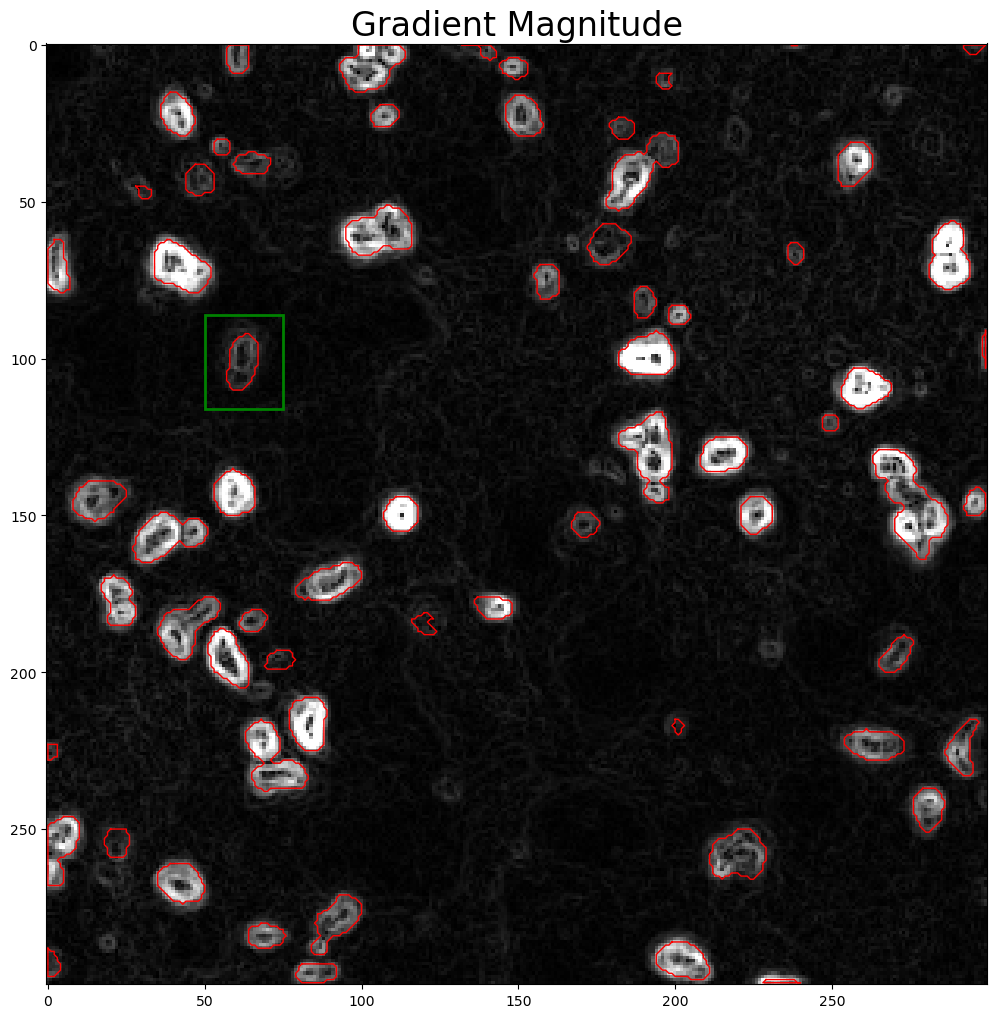

In [36]:
# crop image
x_s = 100
y_s = 150
size = 300
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]

blur = 1
img_blurred = cv2.GaussianBlur(img_cropped, (blur, blur), 0)
img_cropped = img_blurred.astype('int32')

# Step 3: Compute the first derivatives (Sobel filter)
sobel_x = sobel(img_cropped, axis=0)
sobel_y = sobel(img_cropped, axis=1)

# Compute the gradient magnitude
gradient_magnitude = np.hypot(sobel_x, sobel_y)


contours, _ = cv2.findContours(mask_cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure with 4 subplots
original_max = img.max()
fig, ax = plt.subplots( figsize=(20, 10))
plt.tight_layout()

# for ax in [ax1, ax2]:
#     ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


ax.imshow(gradient_magnitude, cmap = 'gray', vmax = original_max *0.5)
ax.set_title('Gradient Magnitude', fontsize=24)
square = patches.Rectangle((50, 86), 25, 30, linewidth=2, edgecolor='g', facecolor='none', zorder=3)
ax.add_patch(square)


for contour in contours:
    contour = np.vstack((contour, contour[0].reshape(1, 1, 2)))
    #ax1.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    ax.plot(contour[:, 0, 0], contour[:, 0, 1], color='red', linewidth=1)
    
plt.savefig('plots/gradient_magn.png', bbox_inches='tight') 

In [17]:
fed_dir


'/home/frieda/master/git/data/fullsize/test/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4.tif'

In [15]:
# Get test images paths 
# Read images
fed_img = cv2.imread('../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4.tif', cv2.IMREAD_UNCHANGED)
starved_img = cv2.imread('../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_S4h_XY2.tif', cv2.IMREAD_UNCHANGED)
refed_img = cv2.imread('../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_R1h_XY5.tif', cv2.IMREAD_UNCHANGED)
# Flatten & clip iamges
min_clip = 120
max_clip = 400
fed_img_flat = fed_img.flatten()
fed_clipped = fed_img[(fed_img > min_clip) & (fed_img < max_clip)]
starved_img_flat = starved_img.flatten()
starved_clipped =  starved_img[(starved_img > min_clip) & (starved_img < max_clip)]
refed_img_flat = refed_img.flatten()
refed_clipped =  refed_img[(refed_img > min_clip) & (refed_img < max_clip)]

In [3]:
df = pd.DataFrame({
    'pixel_value': np.concatenate([fed_img_flat, starved_img_flat, refed_img_flat]),
    'image': np.repeat(['Fed', 'Starved', 'Refed'], [len(fed_img_flat), len(starved_img_flat), len(refed_img_flat)])
})

In [16]:

df = pd.DataFrame({
    'pixel_value': np.concatenate([fed_clipped, starved_clipped, refed_clipped]),
    'image': np.repeat(['Fed', 'Starved', 'Refed'], [len(fed_clipped), len(starved_clipped), len(refed_clipped)])
})

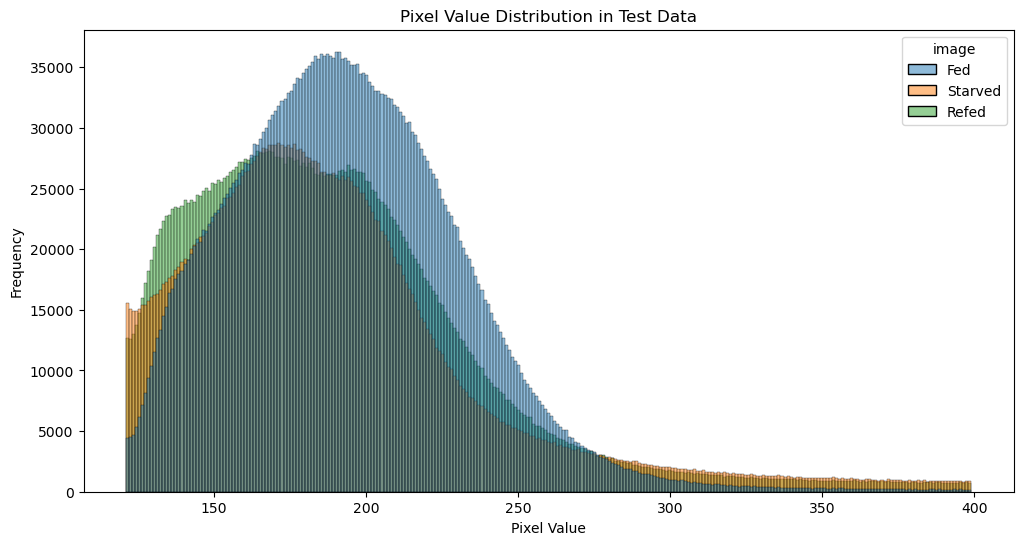

In [17]:
bin_count = max_clip-min_clip-1
# bin_count = starved_img.max()-starved_img.min()
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='pixel_value', hue='image', bins=bin_count , stat='count', legend=True)
# plt.ylim(0, 0.004)
# plt.xlim(80, 350)
plt.title('Pixel Value Distribution in Test Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


In [22]:
img_dir
master/git/data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4.tif

'../data/fullsize/test/images/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4.tif'

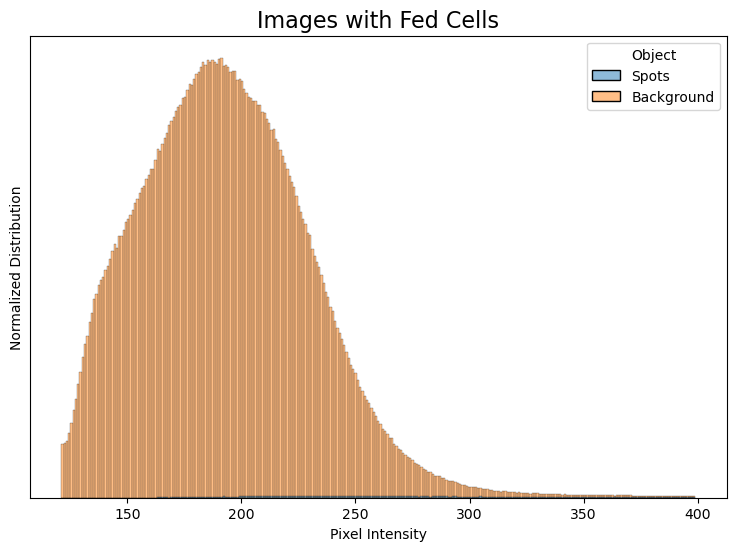

In [23]:
# Get test images paths 
folder_dir = os.getcwd()
img_dir = '../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4.tif'
mask_dir = '../data/fullsize/test/masks/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4_masks.png'
img = cv2.imread(img_dir, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_dir, cv2.IMREAD_UNCHANGED)
# Separate background/spot
background_flat = img[mask == 0].flatten()
spots_flat = img[mask == 255].flatten()
# clip 
min_clip = 120
max_clip = 400
background_flat = background_flat[(background_flat > min_clip) & (background_flat < max_clip)]
spots_flat = spots_flat[(spots_flat > min_clip) & (spots_flat < max_clip)]

df_fed = pd.DataFrame({
    'pixel_value': np.concatenate([spots_flat, background_flat]),
    'Object': np.repeat([ 'Spots','Background'], [len(spots_flat), len(background_flat)])})

fed_count = max_clip-min_clip-1
plt.figure(figsize=(9, 6))
sns.histplot(data=df_fed, x='pixel_value', hue='Object', bins=fed_count , stat="count", legend=True, common_norm=False)
# plt.ylim(0, 0.010)
# plt.xlim(90, 400)
plt.title('Images with Fed Cells', fontsize=16)
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Distribution')

# plt.show()
plt.savefig('plots/fed_histo.png')

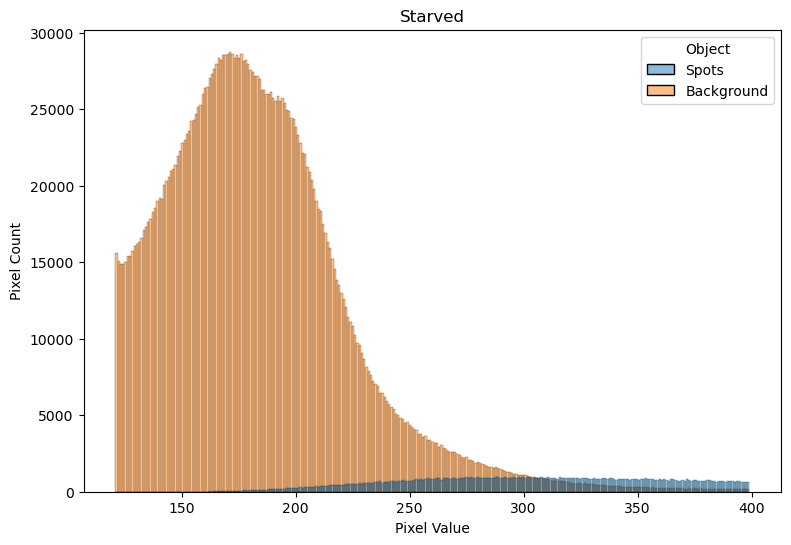

In [31]:
# Get test images paths 
folder_dir = os.getcwd()
img_dir = '../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_S4h_XY2.tif'
mask_dir = '../data/fullsize/test/masks/MF_MaxIP_3ch_2_000_230623_544_84_S4h_XY2_masks.png'
img = cv2.imread(img_dir, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_dir, cv2.IMREAD_UNCHANGED)
# Separate background/spot
background_flat = img[mask == 0].flatten()
spots_flat = img[mask == 255].flatten()
# clip 
min_clip = 120
max_clip = 400
background_flat = background_flat[(background_flat > min_clip) & (background_flat < max_clip)]
spots_flat = spots_flat[(spots_flat > min_clip) & (spots_flat < max_clip)]

df_fed = pd.DataFrame({
    'pixel_value': np.concatenate([spots_flat, background_flat]),
    'Object': np.repeat([ 'Spots','Background'], [len(spots_flat), len(background_flat)])})

fed_count = max_clip-min_clip-1
plt.figure(figsize=(9, 6))
sns.histplot(data=df_fed, x='pixel_value', hue='Object', bins=fed_count , stat="count", legend=True, common_norm=False)
# plt.ylim(0, 0.010)
# plt.xlim(90, 400)
plt.title('Starved')
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Count')
# plt.show()
plt.savefig('plots/fed_histo.png')

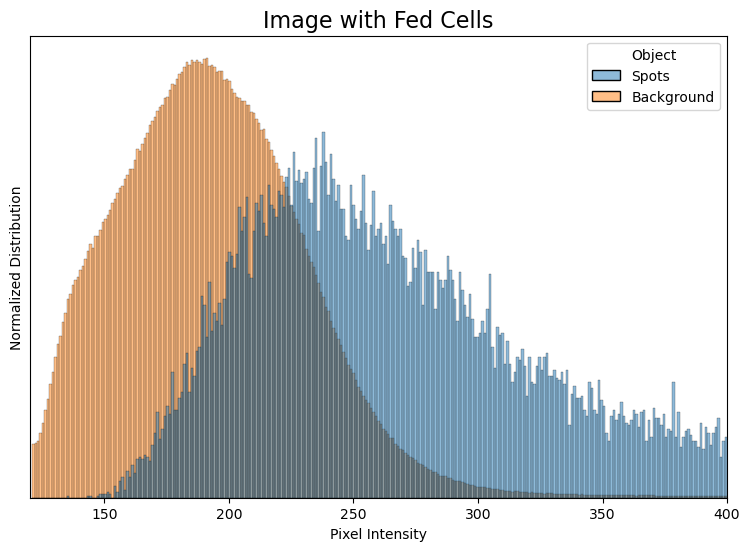

In [54]:
# Get test images paths 
# folder_dir = os.getcwd()
img_dir = '../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4.tif'
mask_dir = '../data/fullsize/test/masks/MF_MaxIP_3ch_2_000_230623_544_84_F_XY4_masks.png'
img = cv2.imread(img_dir, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_dir, cv2.IMREAD_UNCHANGED)

background_flat = img[mask == 0].flatten()
spots_flat = img[mask == 255].flatten()

min_clip = 120
max_clip = 401
background_flat = background_flat[(background_flat > min_clip) & (background_flat < max_clip)]
spots_flat = spots_flat[(spots_flat > min_clip) & (spots_flat < max_clip)]


df_fed = pd.DataFrame({
    'pixel_value': np.concatenate([spots_flat, background_flat]),
    'Object': np.repeat([ 'Spots','Background'], [len(spots_flat), len(background_flat)])})

fed_count = 280 # img.max()-img.min()
plt.figure(figsize=(9, 6))
sns.histplot(data=df_fed, x='pixel_value', hue='Object', bins=fed_count , stat="probability", legend=True, common_norm=False)
# plt.ylim(0, 0.010)
plt.xlim(120, 400)
plt.title('Image with Fed Cells', fontsize=16)
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Distribution')

# Remove y-axis ticks
ax = plt.gca()  # Get current axes
ax.yaxis.set_ticks([])  # Set y-axis ticks to empty list
handles, labels = ax.get_legend_handles_labels()
if handles:
    ax.legend(prop={'size': 16}, title_fontsize=25)  # Adjust legend font size if legend is available
# plt.show()
plt.savefig('plots/fed_histo.png')

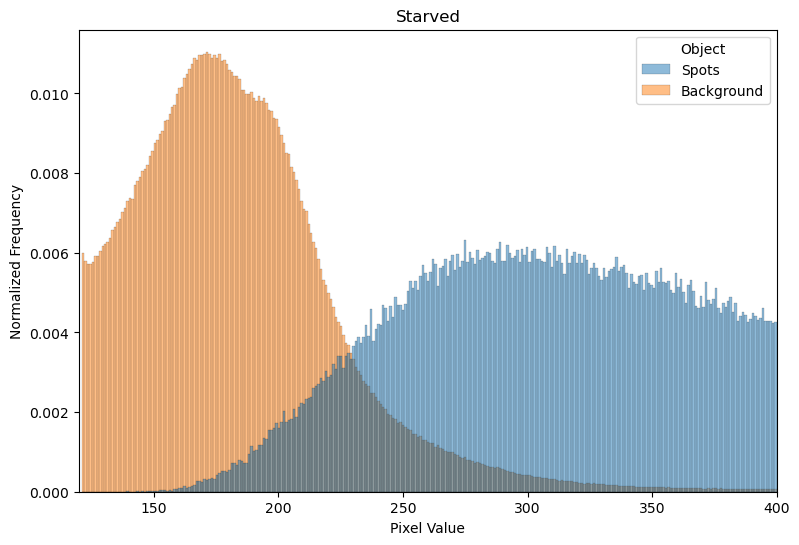

In [51]:
# Get test images paths 

img_dir = '../data/original/test/MF_MaxIP_3ch_2_000_230623_544_84_S4h_XY2.tif'
mask_dir = '../data/fullsize/test/masks/MF_MaxIP_3ch_2_000_230623_544_84_S4h_XY2_masks.png'
img = cv2.imread(img_dir, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_dir, cv2.IMREAD_UNCHANGED)

background_flat = img[mask == 0].flatten()
spots_flat = img[mask == 255].flatten()

min_clip = 120
max_clip = 401
background_flat = background_flat[(background_flat > min_clip) & (background_flat < max_clip)]
spots_flat = spots_flat[(spots_flat > min_clip) & (spots_flat < max_clip)]

df_starved = pd.DataFrame({
    'pixel_value': np.concatenate([spots_flat, background_flat]),
    'Object': np.repeat([ 'Spots','Background'], [len(spots_flat), len(background_flat)])})

starved_count = 280 #img.max()-img.min()
plt.figure(figsize=(9, 6))
sns.histplot(data=df_starved, x='pixel_value', hue='Object', bins=starved_count , stat="density", legend=True, common_norm=False,linewidth=0.1)
# plt.ylim(0, 0.010)
plt.xlim(120, 400)
plt.title('Starved')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
# plt.show()
plt.savefig('plots/starved_histo.png')

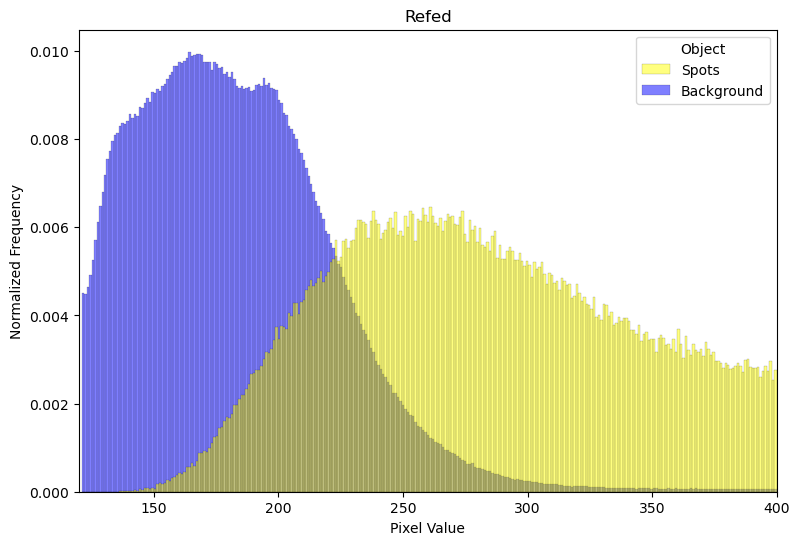

In [53]:
# Get test images paths 
folder_dir = os.getcwd()
img_dir = '../data/original/test//MF_MaxIP_3ch_2_000_230623_544_84_R1h_XY5.tif'
mask_dir = '../data/fullsize/test/masks/MF_MaxIP_3ch_2_000_230623_544_84_R1h_XY5_masks.png'
img = cv2.imread(img_dir, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_dir, cv2.IMREAD_UNCHANGED)

background_flat = img[mask == 0].flatten()
spots_flat = img[mask == 255].flatten()

min_clip = 120
max_clip = 401
background_flat = background_flat[(background_flat > min_clip) & (background_flat < max_clip)]
spots_flat = spots_flat[(spots_flat > min_clip) & (spots_flat < max_clip)]

df_refed = pd.DataFrame({
    'pixel_value': np.concatenate([spots_flat, background_flat]),
    'Object': np.repeat([ 'Spots','Background'], [len(spots_flat), len(background_flat)])})

refed_count = 280 #img.max()-img.min()
plt.figure(figsize=(9, 6))
# sns.histplot(data=df_refed, x='pixel_value', hue='Object', bins=refed_count , stat="density", legend=True, common_norm=False)

# Create the plot
sns.histplot(data=df_refed, x='pixel_value', hue='Object', bins=refed_count, stat="density", 
             legend=True, common_norm=False, linewidth=0.1)
# plt.ylim(0, 0.01)
plt.xlim(120, 400)
plt.title('Refed')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
# plt.show()
plt.savefig('plots/refed_histo.png')

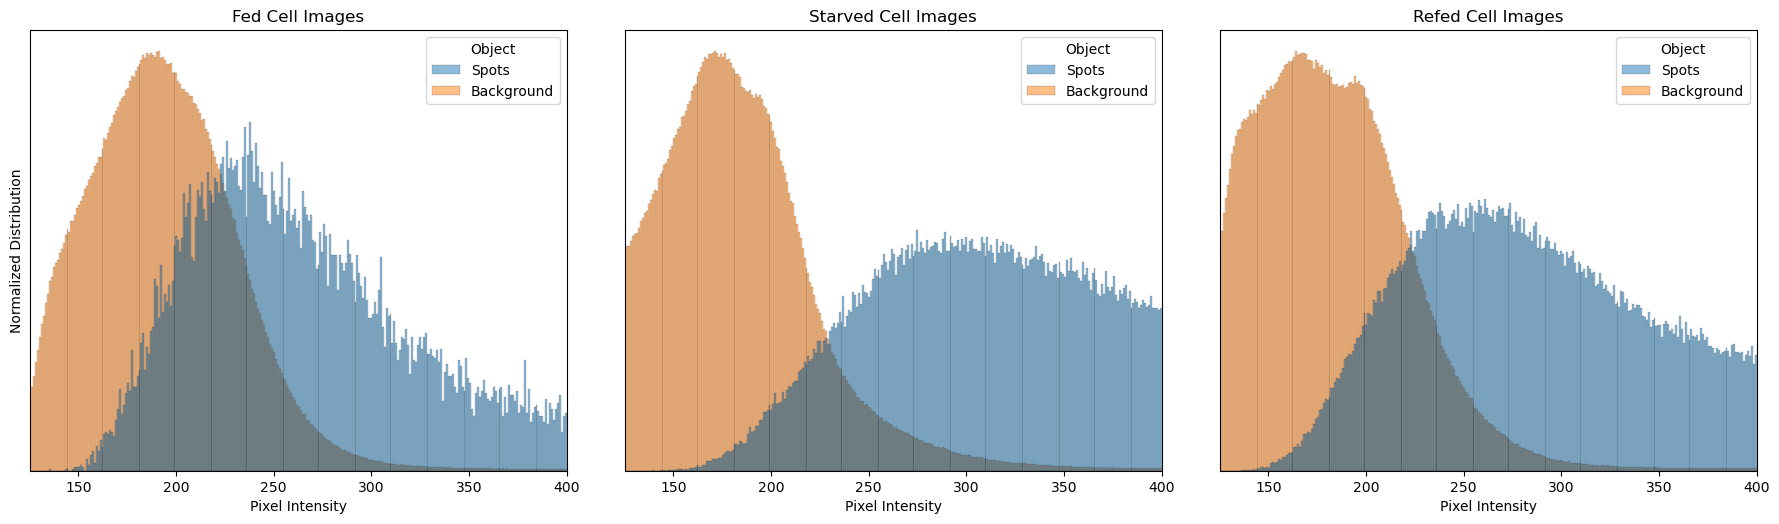

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
plt.tight_layout()

# x_names = [str(i) for i in range(0, 401, 50)]
# x_ticks = list(range(0, 401, 50))
# y_names = [f'{i:.3f}' for i in np.arange(0, 0.010, 0.002)]
# y_ticks = list(np.arange(0, 0.010, 0.002))


for ax in [ax2, ax3]:
    ax.tick_params(left=False, bottom=True, labelleft=False, labelbottom=True)
# ax1.tick_params(left=False, bottom=True, labelleft=True, labelbottom=True)

sns.histplot(data=df_fed, x='pixel_value', hue='Object', bins=fed_count , stat="density", legend=True, common_norm=False,linewidth=0.1, ax=ax1)
# Remove y-axis ticks
# ax1 = plt.gca()  # Get current axes
ax1.yaxis.set_ticks([])  # Set y-axis ticks to empty list
ax1.set_title('Fed Cell Images')
# ax1.set_ylim(0, 0.010)
ax1.set_xlim(125, 400)
ax1.set_ylabel('Normalized Distribution')
ax1.set_xlabel('Pixel Intensity')


# ax1.set_yticks(y_ticks, y_names)
# ax1.set_xticks(x_ticks, x_names)

sns.histplot(data=df_starved, x='pixel_value', hue='Object', bins=starved_count , stat="density", legend=True, common_norm=False,linewidth=0.1, ax=ax2)
ax2.set_title('Starved Cell Images')
# ax2.set_ylim(0, 0.010)
ax2.set_xlim(125, 400)
ax2.set_xlabel('Pixel Intensity')
# ax2.set_xticks(x_ticks, x_names)

sns.histplot(data=df_refed, x='pixel_value', hue='Object', bins=refed_count , stat="density", legend=True, common_norm=False,linewidth=0.1, ax=ax3)
ax3.set_title('Refed Cell Images')
# ax3.set_ylim(0, 0.010)
ax3.set_xlim(125, 400)
ax3.set_xlabel('Pixel Intensity')

plt.savefig('plots/histograms.png', bbox_inches='tight')

# plt.show()

### Calculate area, circularity and peak intensity of ground truth spots

In [3]:
def check_if_cut(cnt, patch_shape):
    cut_mask = False
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    if leftmost[0] == 0 or topmost[0] == 0 or rightmost[1] == patch_shape or bottommost[1] == patch_shape:
        cut_mask = True
    return cut_mask

def get_circularity(perimeter, area):
    if perimeter>0.0:
        circularity = (4 * np.pi * area) / (perimeter ** 2)
    else:
        circularity = 0
    return circularity

def get_peak_intensity(mask, image):
    mask = mask/255
    masked_image = mask * image
    peak_intensity = masked_image.max()
    return peak_intensity


# Convert to 8 bit if needed, could expand to include clipping if needed
def convert_to_8bit(image_16):
    max_value = image_16.max() 
    min_value = image_16.min() 
    image_8 = ((image_16-min_value)/(max_value-min_value)*255).astype('uint8')
    return image_8

In [87]:


def get_peak_intensity(mask, image):
    mask = mask / 255
    masked_image = mask * image
    return masked_image.max()

string_mapping = {
    'f': 'fed',
    'r': 'refed',
    's': 'starved'
}

folder_dir = "../data/original" 
data_dict = {}
index = 0

for data_set in os.listdir(folder_dir):
    dataset_dir = os.path.join(folder_dir, data_set)
    for file_name in os.listdir(dataset_dir):
        if file_name.endswith('.tif'):
            img_path = os.path.join(folder_dir, data_set, file_name)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

            # Load binary masks
            seg_path = os.path.join(dataset_dir, f'{file_name[:-4]}_seg.npy')
            seg_object = np.load(seg_path, allow_pickle=True).item()
            binary_mask = seg_object['masks']
            binary_mask[binary_mask > 0] = 255
            binary_mask = binary_mask.astype(np.uint8)

            contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                area = cv2.contourArea(contour)

                perimeter = cv2.arcLength(contour, True)
                mask_len = len(contour)
                cut_status = check_if_cut(contour, binary_mask.shape[0])
                
                # Create mask and limit region based on bounding box
                x, y, w, h = cv2.boundingRect(contour)
                ROI_mask = np.zeros((h, w), dtype=np.uint8)
                cv2.drawContours(ROI_mask, [contour - np.array([x, y])], -1, color=255, thickness=cv2.FILLED)
                ROI_image = img[y:y+h, x:x+w]
                
                peak_intensity = get_peak_intensity(ROI_mask, ROI_image)

                circularity = get_circularity(perimeter, area)
                fed_state = file_name[33] # Extract state information
                data_dict[index] = {'Dataset': data_set, 
                                    'Area': area,
                                    'Perimeter': perimeter, 
                                    'Mask Length': mask_len,
                                    'is_cut': cut_status,
                                    'Circularity': circularity,
                                    'Nutritional State': fed_state,
                                    'Peak Intensity': peak_intensity}
                index += 1

# Create DataFrame
data_df = pd.DataFrame.from_dict(data_dict, orient='index')
data_df['Nutritional State'] = data_df['Nutritional State'].replace({'F': 'Fed', 'S': 'Starved', 'R': 'Refed'} )

# Define the order for 'Nutritional State'
desired_order = ['Fed', 'Starved', 'Refed']

# Convert 'Nutritional State' to a categorical type with the desired order
data_df['Nutritional State'] = pd.Categorical(data_df['Nutritional State'], categories=desired_order, ordered=True)

# Sort the DataFrame by 'Nutritional State'
sorted_df = data_df.sort_values(by='Nutritional State')

In [174]:
sets = ['S', 'R', 'F']
for set in sets:

    # areas = [entry['area'] for entry in data_dict.values() if entry['fed_state'] == set]
    areas = [entry['Area'] for entry in data_dict.values() if entry.get('Nutritional State', '').upper() == set]
    count = len(areas)
    print(f'\nStats of {count} masks in {set} image patches:')
    print(f'Median Area: {np.median(areas)}')
    print(f'Average area: {np.mean(areas)}')

    perimeters = [entry['Perimeter'] for entry in data_dict.values() if entry.get('Nutritional State', '').upper() == set]
    print(f'Median perimeter: {np.median(perimeters)}')
    print(f'Average perimeter: {sum(perimeters)/count}')

    cut_mask = [entry['is_cut'] for entry in data_dict.values() if entry.get('Nutritional State', '').upper() == set]
    
    print(f'Number of cut masks: {sum(cut_mask)}')
    
    circularity = [entry['Circularity'] for entry in data_dict.values() if entry.get('Nutritional State', '').upper() == set]
    print(f'Median Ccircularity: {np.median(circularity)}')
    print(f'Average circularity: {sum(circularity)/(count-sum(cut_mask))}')

    peak_intensity = [entry['Peak Intensity'] for entry in data_dict.values() if entry.get('Nutritional State', '').upper() == set]
    print(f'Median Peak Intensity: {np.median(peak_intensity)}')
    print(f'Average Peak Intensity: {np.mean(peak_intensity)}')



Stats of 5310 masks in S image patches:
Median Area: 116.0
Average area: 151.24500941619587
Median perimeter: 43.21320295333862
Average perimeter: 50.37505892613962
Number of cut masks: 7
Median Ccircularity: 0.797737896300187
Average circularity: 0.7333350234686165
Median Peak Intensity: 475.0
Average Peak Intensity: 556.2376647834275

Stats of 9544 masks in R image patches:
Median Area: 72.5
Average area: 116.11745599329421
Median perimeter: 34.14213526248932
Average perimeter: 45.158926705103006
Number of cut masks: 34
Median Ccircularity: 0.8003759522730913
Average circularity: 0.7250275830643998
Median Peak Intensity: 578.0
Average Peak Intensity: 671.8216680637049

Stats of 3456 masks in F image patches:
Median Area: 38.0
Average area: 48.785300925925924
Median perimeter: 24.485281229019165
Average perimeter: 27.519730607116664
Number of cut masks: 6
Median Ccircularity: 0.8066435016779822
Average circularity: 0.769212214366553
Median Peak Intensity: 367.0
Average Peak Intensity

Text(0.5, 1.0, 'Area of Ground Truth Spots')

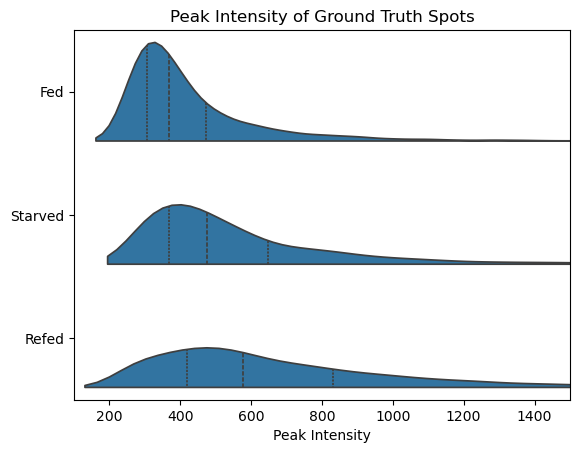

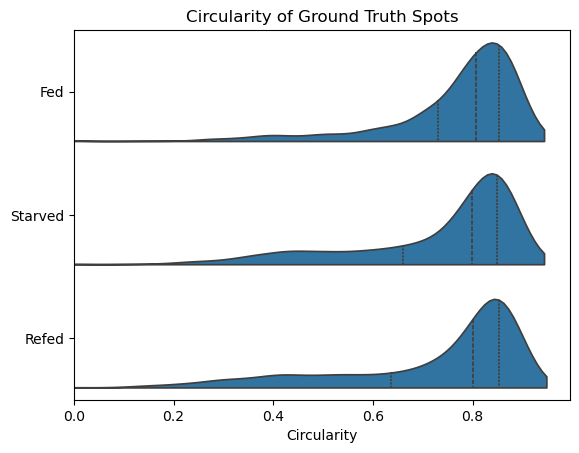

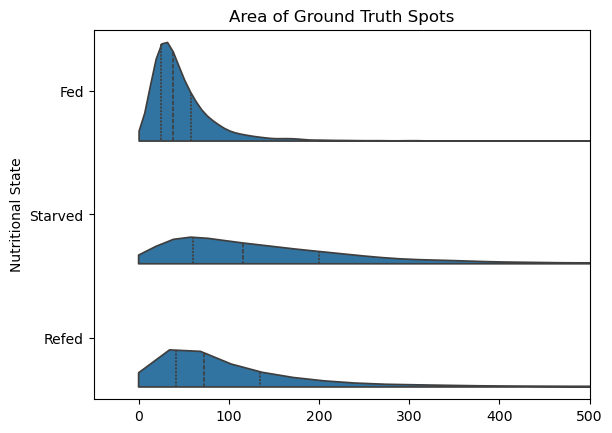

In [92]:
# Create violin plot
fig1 = plt.figure()
ax = sns.violinplot(data=data_df, y='Nutritional State', x='Peak Intensity', inner="quart", split=True,cut=0)
ax.set_ylabel('') 
ax.set_xlim(100,1500) 
ax.set_title('Peak Intensity of Ground Truth Spots')
# Create violin plot
fig1 = plt.figure()
ax = sns.violinplot(data=data_df, y='Nutritional State', x='Circularity', inner="quart", cut=0, split=True)
ax.set_ylabel('') 
ax.set_xlim(0,None)  
ax.set_title('Circularity of Ground Truth Spots')
# Create violin plot
fig1 = plt.figure()
ax = sns.violinplot(data=data_df, y='Nutritional State', x='Area', inner="quart", cut=0, split=True)
# Remove x-axis label
ax.set_xlabel('')  
ax.set_xlim(-50,500) 
ax.set_title('Area of Ground Truth Spots')



Text(0.5, 1.0, 'Area of Ground Truth Spots')

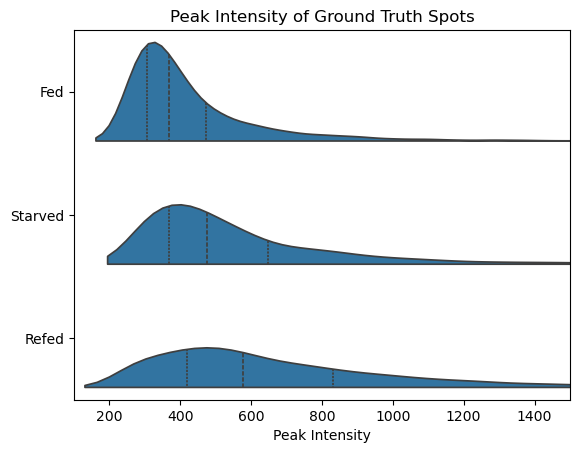

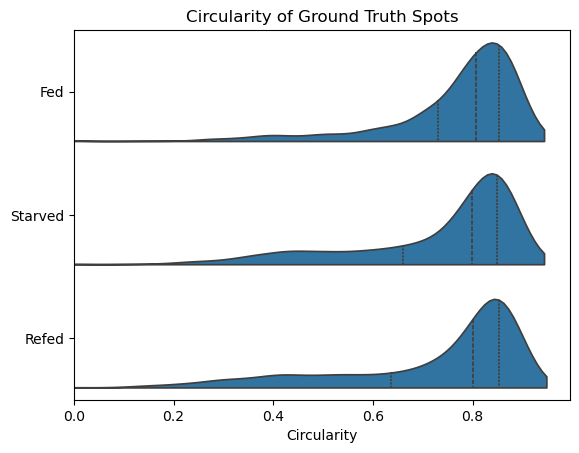

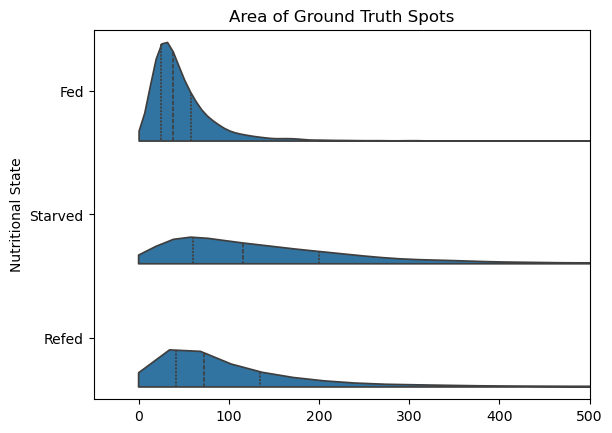

In [92]:
# Create violin plot
fig1 = plt.figure()
ax = sns.violinplot(data=data_df, y='Nutritional State', x='Peak Intensity', inner="quart", split=True,cut=0)
ax.set_ylabel('') 
ax.set_xlim(100,1500) 
ax.set_title('Peak Intensity of Ground Truth Spots')
# Create violin plot
fig1 = plt.figure()
ax = sns.violinplot(data=data_df, y='Nutritional State', x='Circularity', inner="quart", cut=0, split=True)
ax.set_ylabel('') 
ax.set_xlim(0,None)  
ax.set_title('Circularity of Ground Truth Spots')
# Create violin plot
fig1 = plt.figure()
ax = sns.violinplot(data=data_df, y='Nutritional State', x='Area', inner="quart", cut=0, split=True)
# Remove x-axis label
ax.set_xlabel('')  
ax.set_xlim(-50,500) 
ax.set_title('Area of Ground Truth Spots')



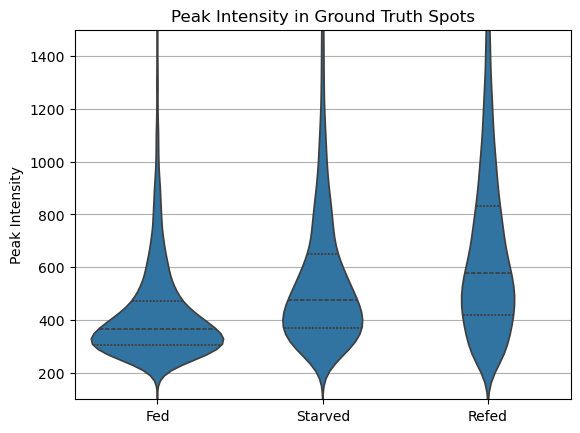

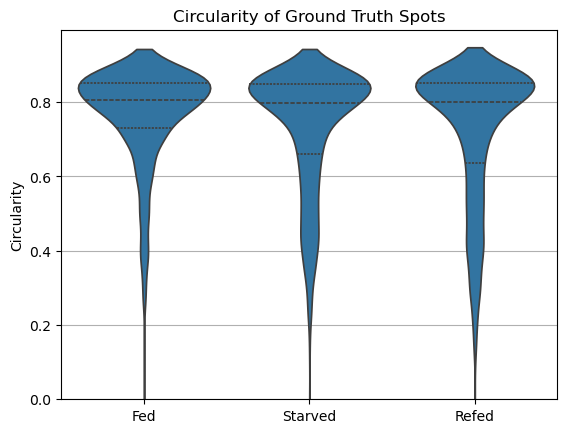

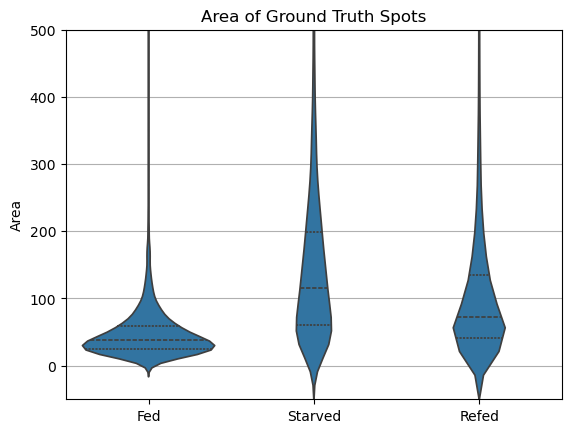

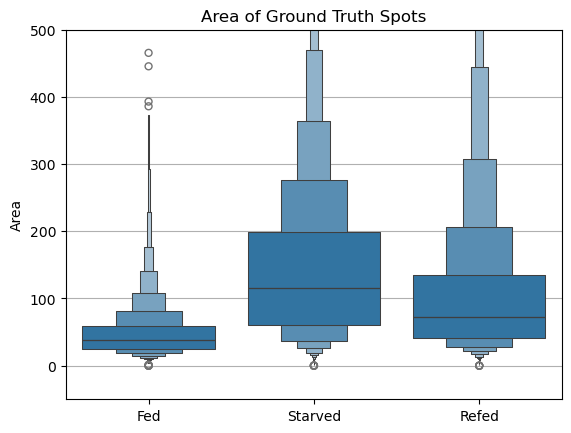

In [110]:
# Create violin plot
fig1 = plt.figure()
ax = sns.violinplot(data=data_df, x='Nutritional State', y='Peak Intensity', inner="quart")
ax.set_xlabel('') 
ax.set_ylim(100,1500) 
ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0)
ax.set_title('Peak Intensity in Ground Truth Spots')
plt.savefig('plots/peak_intensity.png', bbox_inches='tight')

# Create violin plot
fig1 = plt.figure()
ax = sns.violinplot(data=data_df, x='Nutritional State', y='Circularity', inner="quart", cut=0)
ax.set_xlabel('') 
ax.set_ylim(0,None)  
ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0)
ax.set_title('Circularity of Ground Truth Spots')
plt.savefig('plots/circularity.png', bbox_inches='tight')
# Create violin plot
fig1 = plt.figure()
ax = sns.violinplot(data=data_df, x='Nutritional State', y='Area', inner="quart", )
# Remove x-axis label
ax.set_xlabel('')  
ax.set_ylim(-50,500) 
ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0)
ax.set_title('Area of Ground Truth Spots')
plt.savefig('plots/area.png', bbox_inches='tight')

# Create boxen plots
fig1 = plt.figure()
ax = sns.boxenplot(data=data_df, x='Nutritional State', y='Area',  )
# Remove x-axis label
ax.set_xlabel('')  
ax.set_ylim(-50,500) 
ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0)
ax.set_title('Area of Ground Truth Spots')
plt.savefig('plots/area.png', bbox_inches='tight')

# fig1 = plt.figure()
# ax = sns.boxenplot(data=data_df, x='Nutritional State', y='Peak Intensity')
# ax.set_xlabel('') 
# ax.set_ylim(100,1500) 
# ax.set_axisbelow(True)
# ax.grid(axis='y', zorder=0)
# ax.set_title('Peak Intensity in Ground Truth Spots')
# plt.savefig('plots/peak_intensity.png', bbox_inches='tight')



<Axes: title={'center': 'Peak Intensity in Ground Truth Spots'}, xlabel='Area', ylabel='Peak Intensity'>

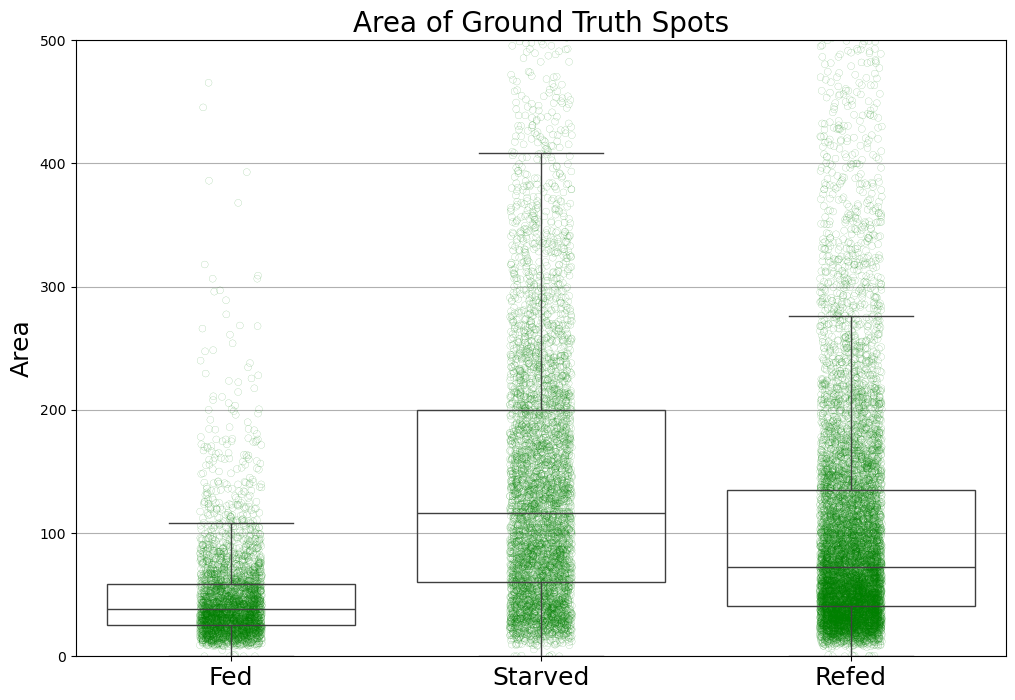

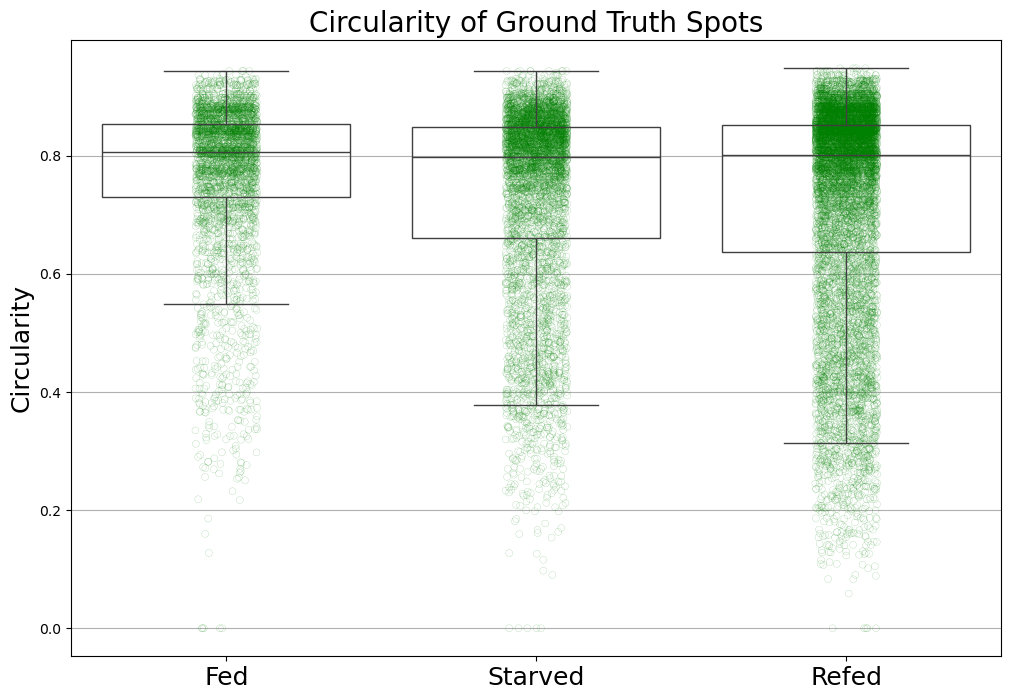

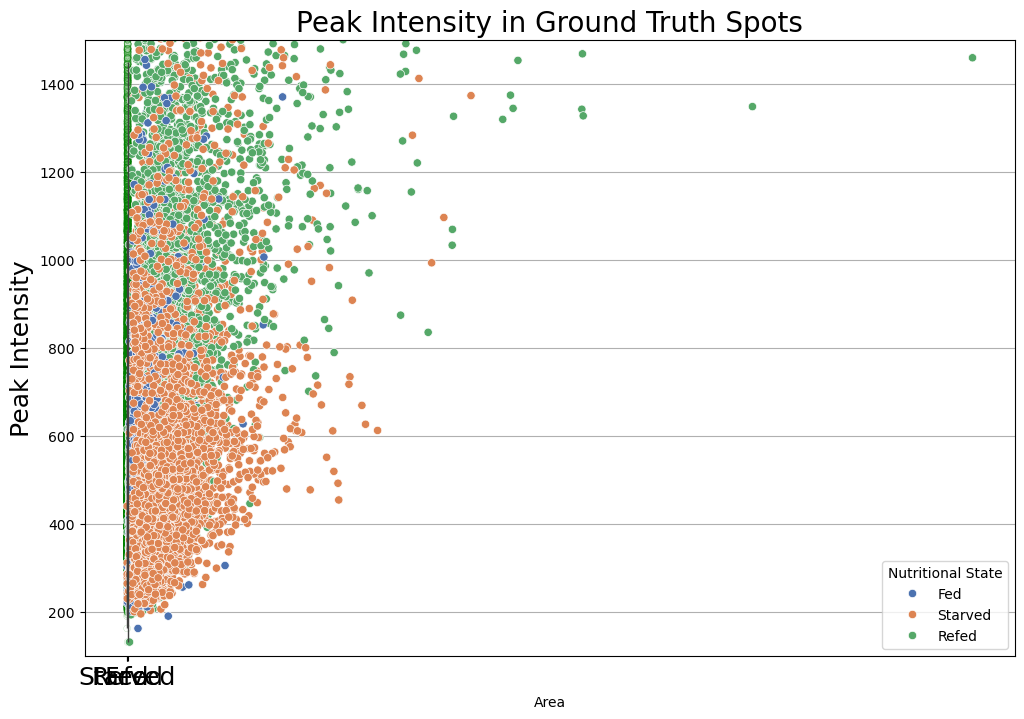

In [175]:

fig1 = plt.figure(figsize=(12,8))
sns.stripplot(data=data_df, x='Nutritional State', y='Area', alpha=0.8, zorder=1, size=5, facecolor='none', edgecolor='green', linewidth=0.1,)

# Plot boxplot without fill, with a higher zorder
ax = sns.boxplot(data=data_df, x='Nutritional State', y='Area', showfliers=False, boxprops=dict(facecolor='none', zorder=2))

ax.set_xlabel('') 
ax.set_ylabel('Area', fontsize=18)
ax.set_ylim(0,500) 
ax.set_axisbelow(True)
plt.setp(ax.get_xticklabels(), fontsize=18) 
ax.grid(axis='y', zorder=0)
ax.set_title('Area of Ground Truth Spots', fontsize=20)
plt.savefig('plots/area.png', bbox_inches='tight')

fig1 = plt.figure(figsize=(12,8))
sns.stripplot(data=data_df, x='Nutritional State', y='Circularity', alpha=0.8, zorder=1, size=5, facecolor='none', edgecolor='green', linewidth=0.1,)

# Plot boxplot without fill, with a higher zorder
ax = sns.boxplot(data=data_df, x='Nutritional State', y='Circularity', showfliers=False, boxprops=dict(facecolor='none', zorder=2))

ax.set_xlabel('') 

# ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)  # Adjust font size of x-tick labels
plt.setp(ax.get_xticklabels(), fontsize=18) 

# ax.set_ylim(100,1500) 
ax.set_axisbelow(True)
ax.grid(axis='y', zorder=0)
ax.set_ylabel('Circularity', fontsize=18)
ax.set_title('Circularity of Ground Truth Spots', fontsize=20)
plt.savefig('plots/circularity.png', bbox_inches='tight')


fig1 = plt.figure(figsize=(12,8))
sns.stripplot(data=data_df, x='Nutritional State', y='Peak Intensity', alpha=0.8, zorder=1, size=5, facecolor='none', edgecolor='green', linewidth=0.1,)

# Plot boxplot without fill, with a higher zorder
ax = sns.boxplot(data=data_df, x='Nutritional State', y='Peak Intensity', showfliers=False, boxprops=dict(facecolor='none', zorder=2))

ax.set_xlabel('') 
ax.set_ylabel('Peak Intensity', fontsize=18)
ax.set_ylim(100,1500) 
ax.set_axisbelow(True)
plt.setp(ax.get_xticklabels(), fontsize=18) 
ax.grid(axis='y', zorder=0)
ax.set_title('Peak Intensity in Ground Truth Spots', fontsize=20)
plt.savefig('plots/peak_intensity.png', bbox_inches='tight')



<Axes: xlabel='Area', ylabel='Peak Intensity'>

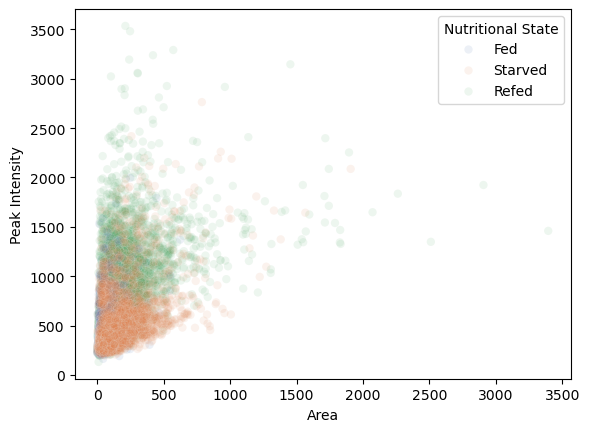

In [180]:
fig1 = plt.figure()
sns.scatterplot(data=data_df, x='Area', y='Peak Intensity', hue='Nutritional State', palette="deep", alpha=0.1)

In [19]:


def get_peak_intensity(mask, image):
    mask = mask / 255
    masked_image = mask * image
    return masked_image.max()

folder_dir = "../data/original" 
data_dict = {}
index = 0

for data_set in os.listdir(folder_dir):
    dataset_dir = os.path.join(folder_dir, data_set)
    for file_name in os.listdir(dataset_dir):
        if file_name.endswith('.tif'):
            img_path = os.path.join(folder_dir, data_set, file_name)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

            # Load binary masks
            seg_path = os.path.join(dataset_dir, f'{file_name[:-4]}_seg.npy')
            seg_object = np.load(seg_path, allow_pickle=True).item()
            binary_mask = seg_object['masks']
            binary_mask[binary_mask > 0] = 255
            binary_mask = binary_mask.astype(np.uint8)

            contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                area = cv2.contourArea(contour)
                perimeter = cv2.arcLength(contour, True)
                mask_len = len(contour)
                cut_status = check_if_cut(contour, binary_mask.shape[0])
                
                # Create mask and limit region based on bounding box
                x, y, w, h = cv2.boundingRect(contour)
                ROI_mask = np.zeros((h, w), dtype=np.uint8)
                cv2.drawContours(ROI_mask, [contour - np.array([x, y])], -1, color=255, thickness=cv2.FILLED)
                ROI_image = img[y:y+h, x:x+w]
                
                peak_intensity = get_peak_intensity(ROI_mask, ROI_image)

                circularity = get_circularity(perimeter, area)
                fed_state = file_name[33] # Extract state information
                data_dict[index] = {'dataset': data_set, 
                                    'area': area,
                                    'perimeter': perimeter, 
                                    'mask_length': mask_len,
                                    'is_cut': cut_status,
                                    'circularity': circularity,
                                    'fed_state': fed_state,
                                    'peak_intensity': peak_intensity}
                index += 1



In [50]:
f_img

array([[562, 456, 472, ..., 122, 132, 497],
       [505, 505, 419, ..., 120, 124, 129],
       [497, 493, 435, ..., 121, 118, 132],
       ...,
       [249, 275, 270, ..., 120, 114, 141],
       [254, 277, 232, ..., 138, 126, 130],
       [262, 260, 259, ..., 119, 123, 131]], dtype=uint16)

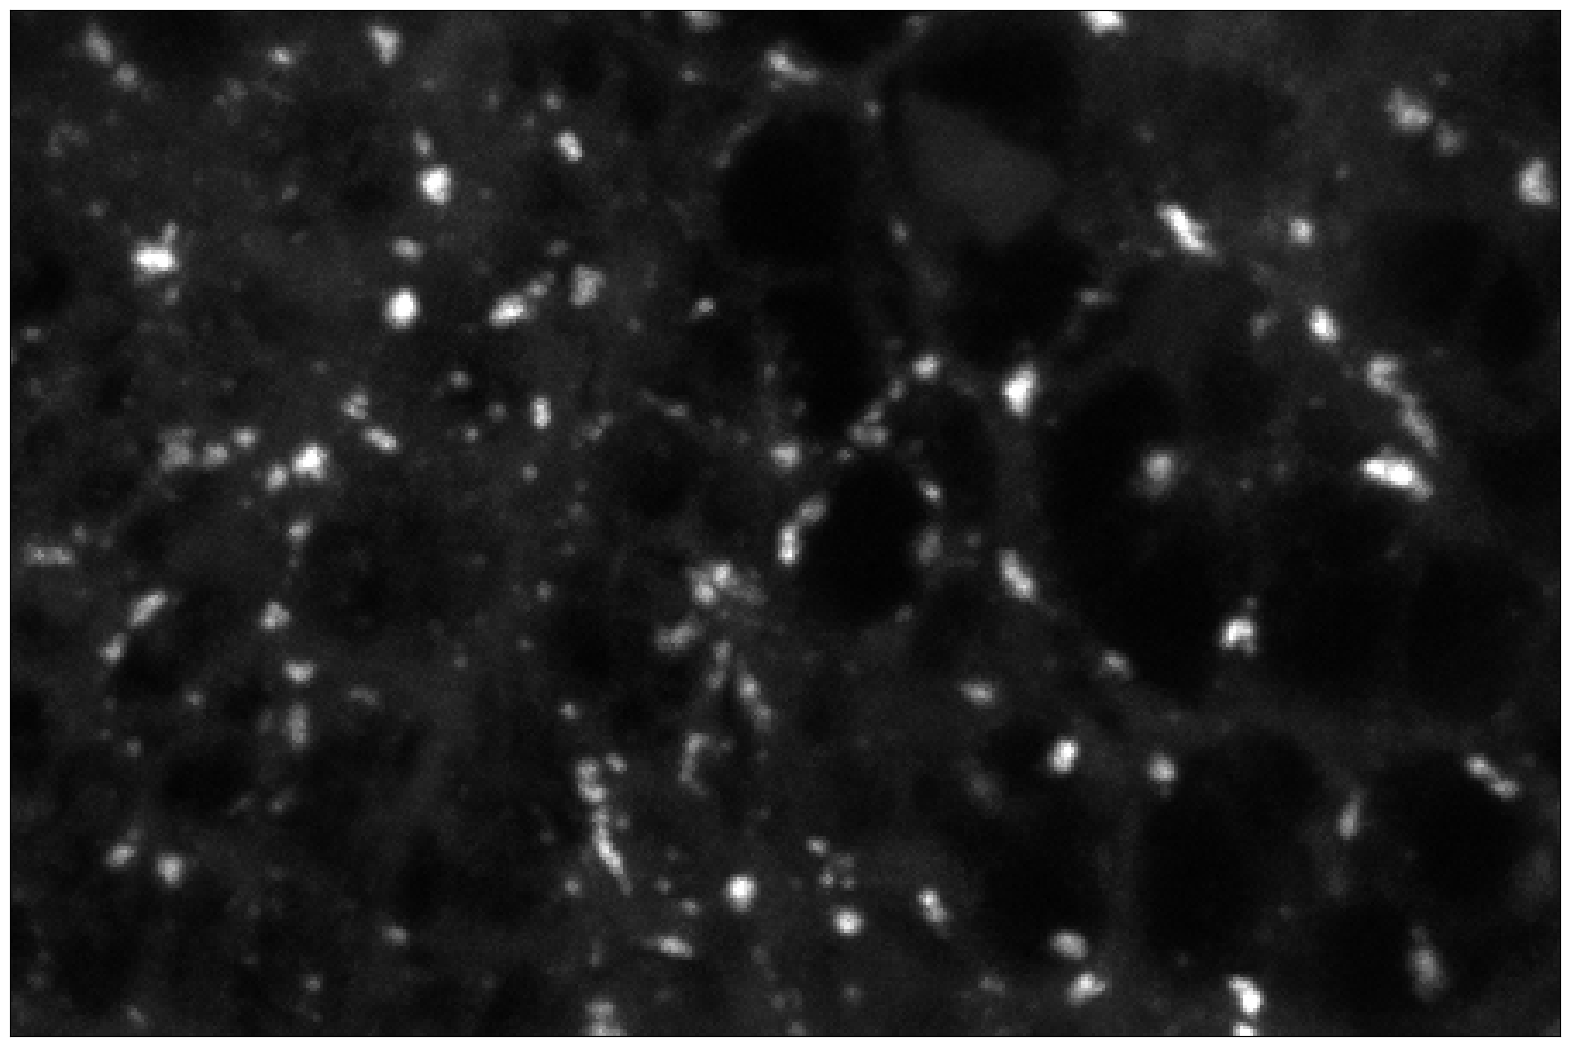

In [49]:

# img = f_img[:,:,0]
# crop image
x_s = 200
y_s = 1750
size = 450
# x_s = 180
# y_s = 180
# size = 60
img_cropped = img[y_s:y_s+size, x_s:x_s+size]
mask_cropped = mask[y_s:y_s+size, x_s:x_s+size]


# Create a figure with 4 subplots
original_max = img.max()
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

ax.imshow(img_cropped, cmap='gray', vmax = original_max*0.5)
# ax.set_title('Merged Ground Truth Spots', fontsize=24)

plt.savefig('plots/nuc.png', bbox_inches='tight') 